<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read file
df = pd.read_excel("/content/sales_data (Not used still).xlsx")
print(df)

# Quick look
print(df.head())
print(df.info())

#Check missing value
print(df.isnull().sum())

# Fill missing Value
# df["Sales"].fillna(df["Sales"].mean(), inplace = True)
# df["Experience"].fillna(0, inplace = True)
# print(df.isnull().sum())

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# Convert Sale_Date to proper datetime
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"], errors="coerce")

# Check again
print(df["Sale_Date"].dtype)

# Profit per unit
df["Total_Profit"] = (df["Unit_Price"] - df["Unit_Cost"]) * df["Quantity_Sold"]
df["Net_Sales"] = df["Sales_Amount"] * (1 - df["Discount"])
df["Year"] = df["Sale_Date"].dt.year
df["Month"] = df["Sale_Date"].dt.month
df["Month_Name"] = df["Sale_Date"].dt.month_name()

# Groupby Function
# TOP KPI CARDS
top_kpis = {
    "Total_Sales": df["Sales_Amount"].sum(),
    "Total_Profit": df["Total_Profit"].sum(),
    "Total_Orders": df["Product_ID"].count(),
    "Avg_Order_Value": df["Net_Sales"].mean()
}
print("\nTop KPIs:\n", top_kpis)

# Sales by Region
region_kpis = df.groupby("Region")["Sales_Amount"].sum().reset_index()
print("\nSales by Region:\n", region_kpis)

# Profit by Region
profit_by_region = df.groupby("Region")["Total_Profit"].sum().reset_index()
print("\n","Profit by Region:\n",profit_by_region)

# Sales by Product Category
product_sales = df.groupby("Product_Category")["Sales_Amount"].sum().reset_index()
print("\nSales by Product Category:\n", product_sales)

# Top Sales Reps (Performance)
sales_by_rep = (df.groupby("Sales_Rep")["Sales_Amount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
print("\nTop Sales Performance:\n",sales_by_rep)

# Monthly Sales Trend
monthly_sales = (
    df.groupby(["Year", "Month", "Month_Name"])["Sales_Amount"]
    .sum()
    .reset_index()
    .sort_values(["Year", "Month"])
)
print("\nMonthly Sales Trend:\n", monthly_sales)

# Customer Type Analysis
customer_sales = df.groupby("Customer_Type")["Sales_Amount"].sum().reset_index()
print("\nCustomer Type Analysis:\n",customer_sales)

# Payment Method Usage
payment_analysis = df.groupby("Payment_Method")["Sales_Amount"].sum().reset_index()
print("\nPayment Method Usage:\n",payment_analysis)

# Sales Channel Performance
channel_sales = df.groupby("Sales_Channel")["Sales_Amount"].sum().reset_index()
print("\nSales by Channel:\n", channel_sales)

# Save final clean dataset
df.to_csv("final_clean_sales_data.csv", index=False)

print("\nDataset is clean, enriched, and can start work on Dashboard")

     Product_ID            Sale_Date Sales_Rep Region  Sales_Amount  \
0          1052  2023-03-02 00:00:00       Bob  North       5053.97   
1          1093            4/21/2023       Bob   West       4384.02   
2          1015            9/21/2023     David  South       4631.23   
3          1072            8/24/2023       Bob  South       2167.94   
4          1061            3/24/2023   Charlie   East       3750.20   
..          ...                  ...       ...    ...           ...   
995        1010            4/15/2023   Charlie  North       4733.88   
996        1067  2023-07-09 00:00:00       Bob  North       4716.36   
997        1018            4/27/2023     David  South       7629.70   
998        1100           12/20/2023     David   West       1629.47   
999        1086            8/16/2023     Alice   East       4923.93   

     Quantity_Sold Product_Category  Unit_Cost  Unit_Price Customer_Type  \
0               18        Furniture     152.75      267.22     Returnin

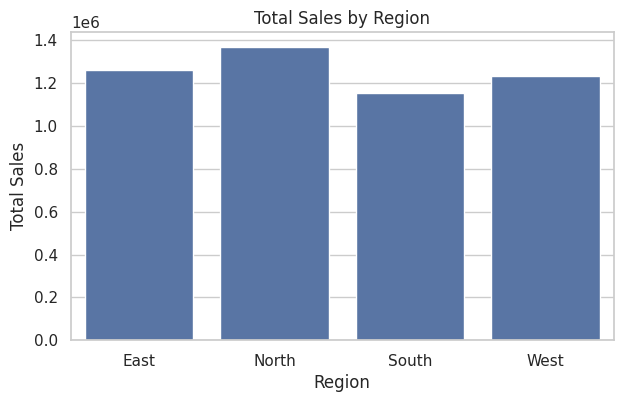

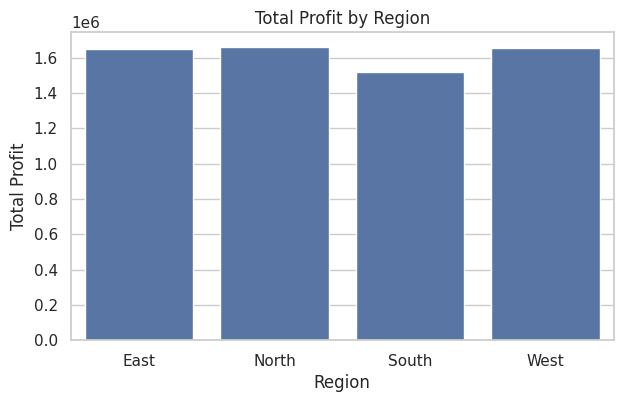

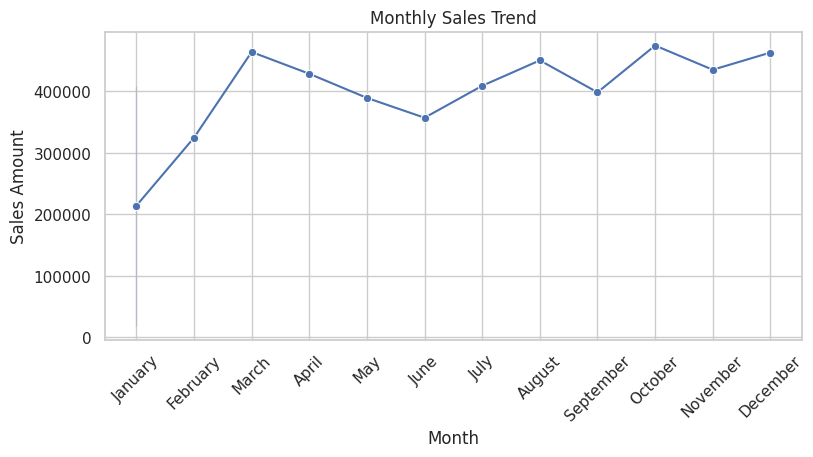

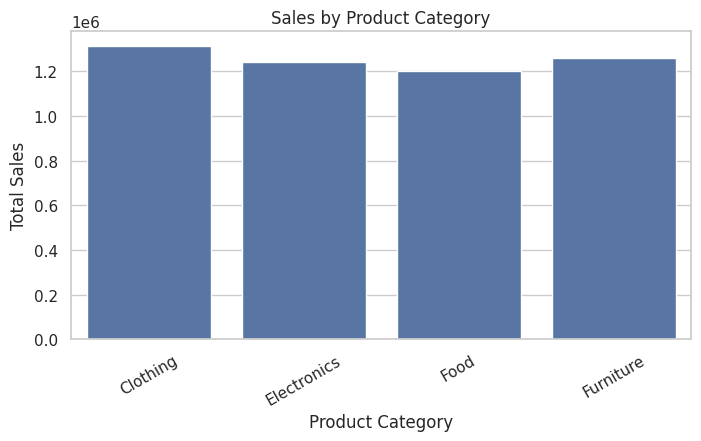

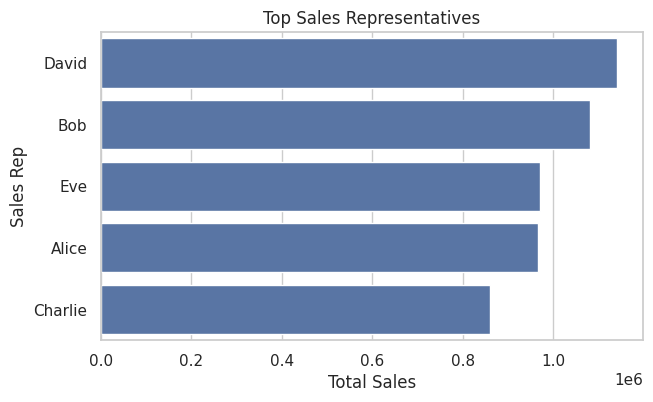

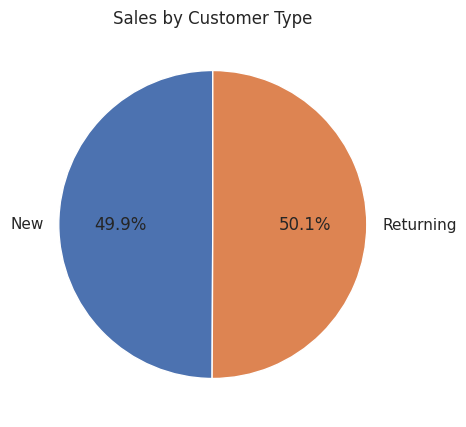

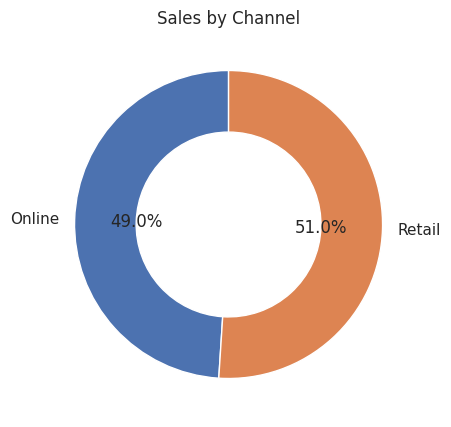

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# SALES BY REGION (Bar Chart)
plt.figure(figsize=(7,4))
sns.barplot(data=region_kpis, x="Region", y="Sales_Amount")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# PROFIT BY REGION (Bar Chart)
plt.figure(figsize=(7,4))
sns.barplot(data=profit_by_region, x="Region", y="Total_Profit")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

# MONTHLY SALES TREND (Line Chart)
plt.figure(figsize=(9,4))
sns.lineplot(data=monthly_sales, x="Month_Name", y="Sales_Amount", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

# SALES BY PRODUCT CATEGORY (Bar Chart)
plt.figure(figsize=(8,4))
sns.barplot(data=product_sales, x="Product_Category", y="Sales_Amount")
plt.title("Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()

# TOP SALES REPS (Horizontal Bar)
plt.figure(figsize=(7,4))
sns.barplot(data=sales_by_rep, y="Sales_Rep", x="Sales_Amount")
plt.title("Top Sales Representatives")
plt.xlabel("Total Sales")
plt.ylabel("Sales Rep")
plt.show()

# SALES BY CUSTOMER TYPE (Pie / Donut)
plt.figure(figsize=(5,5))
plt.pie(
    customer_sales["Sales_Amount"],
    labels=customer_sales["Customer_Type"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sales by Customer Type")
plt.show()

# SALES BY CHANNEL (Donut Chart)
plt.figure(figsize=(5,5))
plt.pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"width":0.4}
)
plt.title("Sales by Channel")
plt.show()


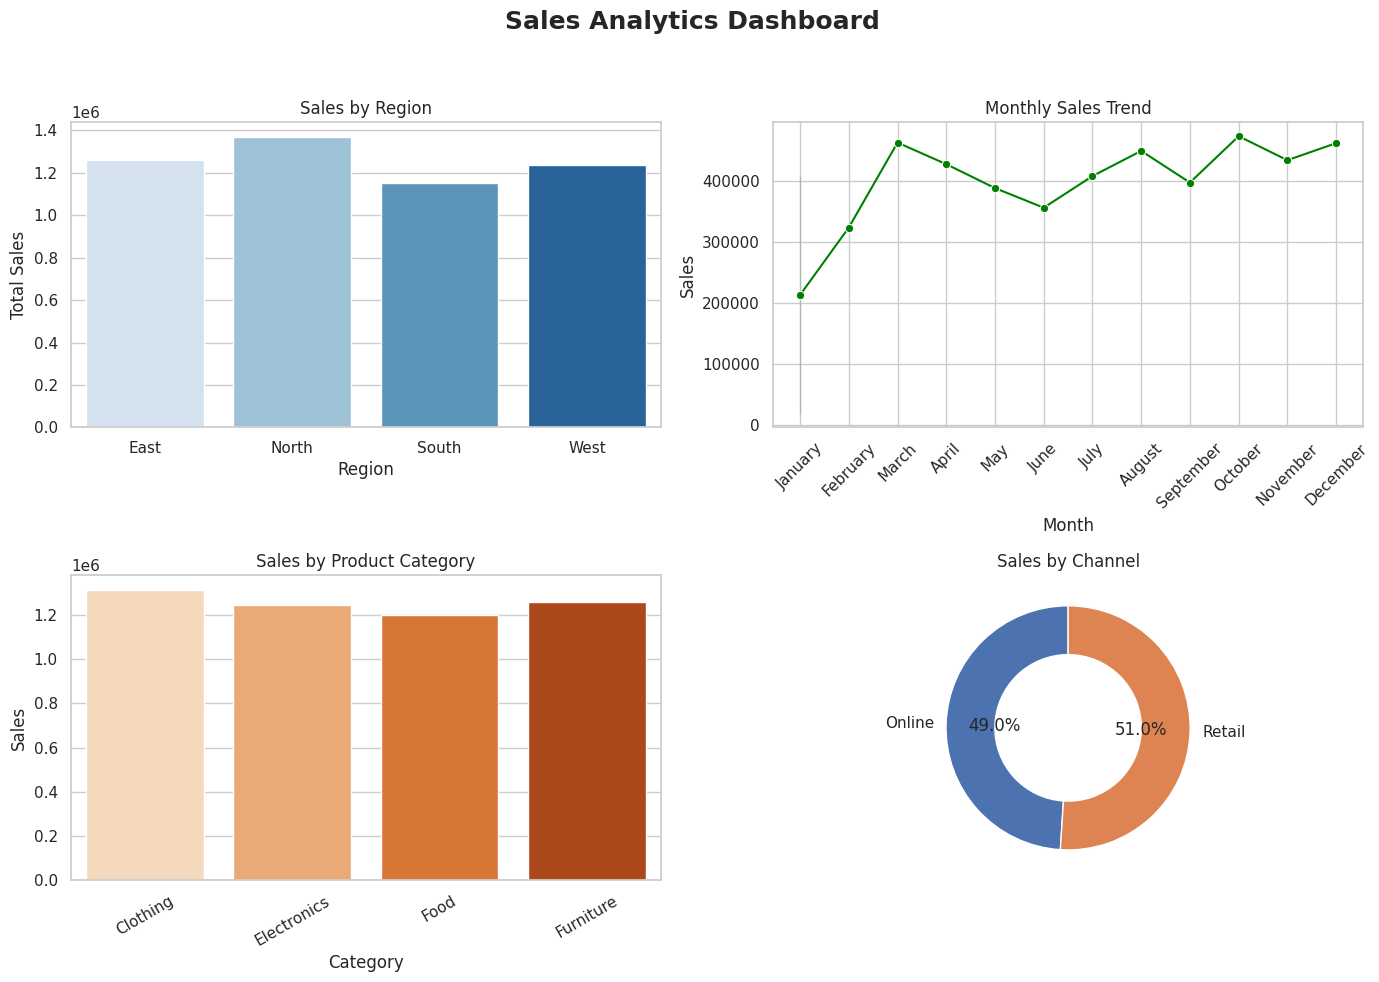

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Sales Analytics Dashboard", fontsize=18, fontweight="bold")

# 1. Sales by Region (Bar)
sns.barplot(
    data=region_kpis,
    x="Region",
    y="Sales_Amount",
    hue="Region",
    palette="Blues",
    legend=False,
    ax=axes[0,0]
)
axes[0,0].set_title("Sales by Region")
axes[0,0].set_xlabel("Region")
axes[0,0].set_ylabel("Total Sales")

# 2. Monthly Sales Trend (Line)
sns.lineplot(
    data=monthly_sales,
    x="Month_Name",
    y="Sales_Amount",
    marker="o",
    color="green",
    ax=axes[0,1]
)
axes[0,1].set_title("Monthly Sales Trend")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Sales")
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Product Category Sales (Bar)
sns.barplot(
    data=product_sales,
    x="Product_Category",
    y="Sales_Amount",
    hue="Product_Category",
    palette="Oranges",
    legend=False,
    ax=axes[1,0]
)
axes[1,0].set_title("Sales by Product Category")
axes[1,0].set_xlabel("Category")
axes[1,0].set_ylabel("Sales")
axes[1,0].tick_params(axis='x', rotation=30)

# 4. Sales by Channel (Donut)
axes[1,1].pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"width":0.4}
)
axes[1,1].set_title("Sales by Channel")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


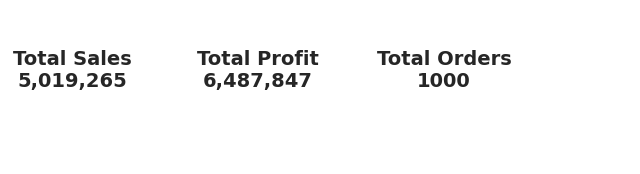

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,2))
ax.axis("off")

ax.text(0.1, 0.5, f"Total Sales\n{df['Sales_Amount'].sum():,.0f}",
        fontsize=14, weight="bold", ha="center")

ax.text(0.4, 0.5, f"Total Profit\n{df['Total_Profit'].sum():,.0f}",
        fontsize=14, weight="bold", ha="center")

ax.text(0.7, 0.5, f"Total Orders\n{df['Product_ID'].count()}",
        fontsize=14, weight="bold", ha="center")

plt.show()


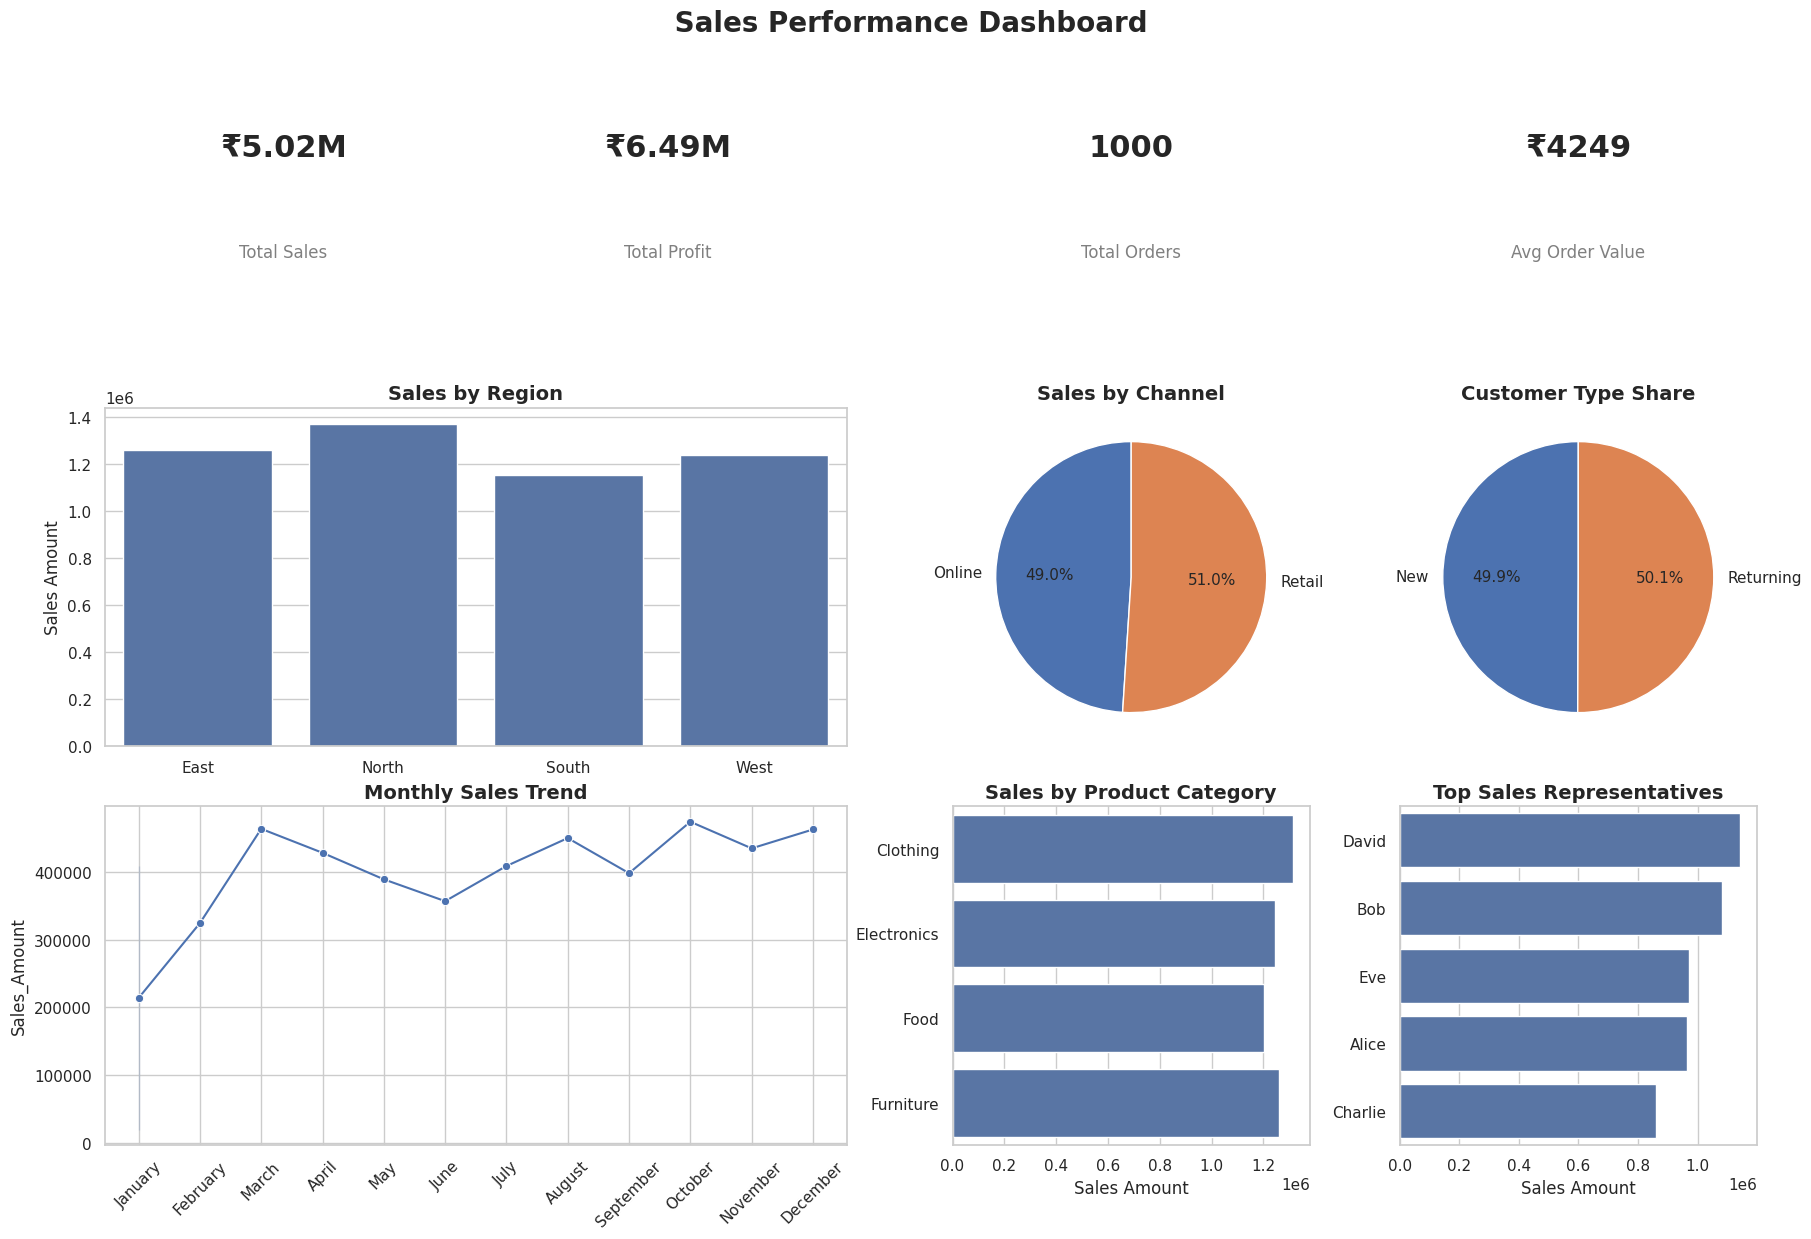

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 12)
plt.rcParams["font.size"] = 11

# Create figure
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 4)

# ================= KPI CARDS =================
ax_kpi1 = fig.add_subplot(gs[0, 0])
ax_kpi2 = fig.add_subplot(gs[0, 1])
ax_kpi3 = fig.add_subplot(gs[0, 2])
ax_kpi4 = fig.add_subplot(gs[0, 3])

kpi_axes = [ax_kpi1, ax_kpi2, ax_kpi3, ax_kpi4]
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

for ax, title, value in zip(kpi_axes, kpi_titles, kpi_values):
    ax.axis("off")
    ax.text(0.5, 0.65, value, fontsize=22, fontweight="bold", ha="center")
    ax.text(0.5, 0.35, title, fontsize=12, ha="center", color="gray")
    ax.set_facecolor("#f4f6f9")

# ================= SALES BY REGION =================
ax1 = fig.add_subplot(gs[1, 0:2])
sns.barplot(data=region_kpis, x="Region", y="Sales_Amount", ax=ax1)
ax1.set_title("Sales by Region", fontsize=14, fontweight="bold")
ax1.set_ylabel("Sales Amount")
ax1.set_xlabel("")

# ================= SALES CHANNEL (PIE) =================
ax2 = fig.add_subplot(gs[1, 2])
ax2.pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90
)
ax2.set_title("Sales by Channel", fontsize=14, fontweight="bold")

# ================= CUSTOMER TYPE (PIE) =================
ax3 = fig.add_subplot(gs[1, 3])
ax3.pie(
    customer_sales["Sales_Amount"],
    labels=customer_sales["Customer_Type"],
    autopct="%1.1f%%",
    startangle=90
)
ax3.set_title("Customer Type Share", fontsize=14, fontweight="bold")

# ================= MONTHLY SALES TREND =================
ax4 = fig.add_subplot(gs[2, 0:2])
sns.lineplot(
    data=monthly_sales,
    x="Month_Name",
    y="Sales_Amount",
    marker="o",
    ax=ax4
)
ax4.set_title("Monthly Sales Trend", fontsize=14, fontweight="bold")
ax4.set_xlabel("")
ax4.tick_params(axis="x", rotation=45)

# ================= PRODUCT CATEGORY =================
ax5 = fig.add_subplot(gs[2, 2])
sns.barplot(
    data=product_sales,
    x="Sales_Amount",
    y="Product_Category",
    ax=ax5
)
ax5.set_title("Sales by Product Category", fontsize=14, fontweight="bold")
ax5.set_xlabel("Sales Amount")
ax5.set_ylabel("")

# ================= TOP SALES REP =================
ax6 = fig.add_subplot(gs[2, 3])
sns.barplot(
    data=sales_by_rep.head(5),
    x="Sales_Amount",
    y="Sales_Rep",
    ax=ax6
)
ax6.set_title("Top Sales Representatives", fontsize=14, fontweight="bold")
ax6.set_xlabel("Sales Amount")
ax6.set_ylabel("")

# Dashboard title
fig.suptitle(
    " Sales Performance Dashboard",
    fontsize=20,
    fontweight="bold",
    y=1.02
)

plt.show()


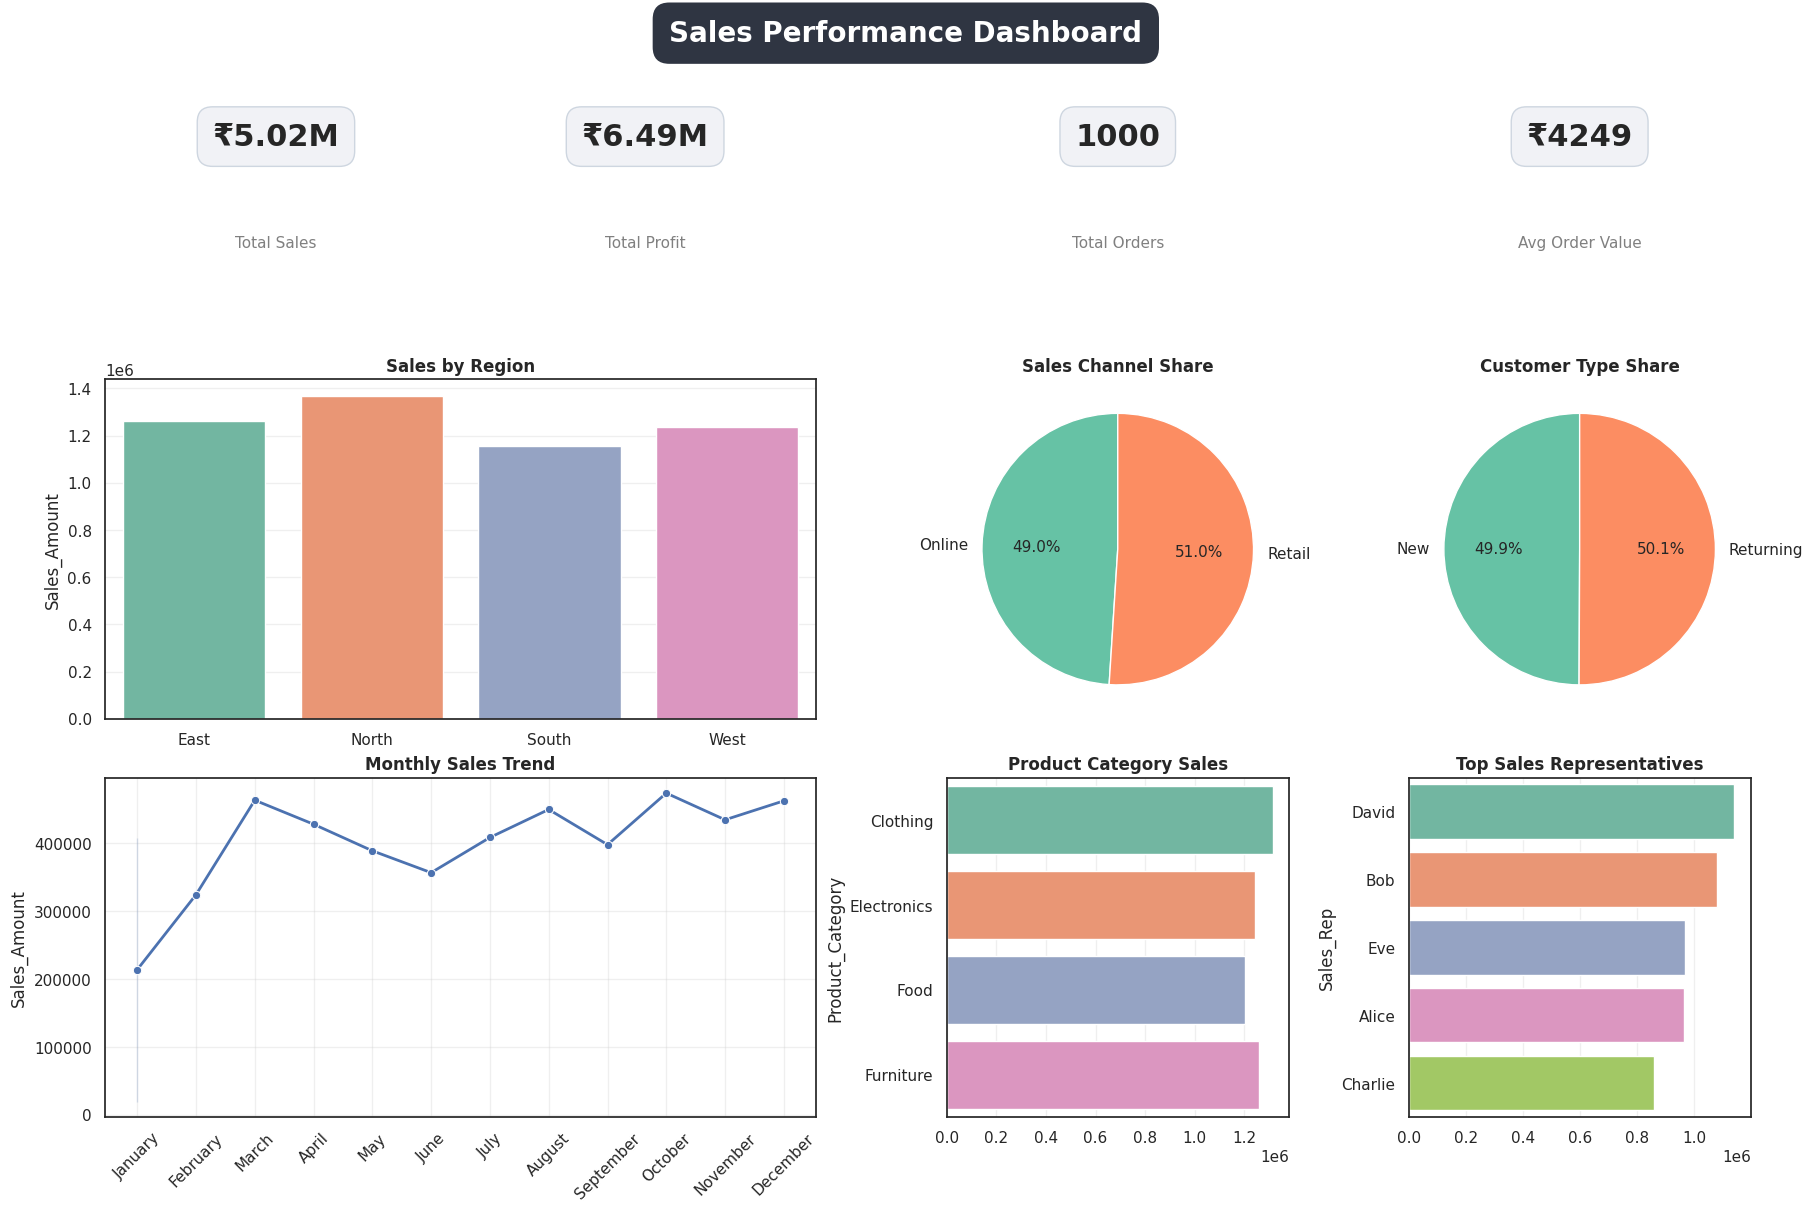

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================= GLOBAL STYLE =================
sns.set_theme(style="white")

plt.rcParams.update({
    "figure.figsize": (18, 12),
    "font.size": 11
})

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3, 4)

# ================= HEADER =================
fig.text(
    0.5, 0.97,
    "Sales Performance Dashboard",
    ha="center",
    fontsize=20,
    fontweight="bold",
    color="white",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor="#2f3542",
        edgecolor="none"
    )
)

# ================= KPI CARDS =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.axis("off")

    ax.text(
        0.5, 0.6,
        kpi_values[i],
        fontsize=22,
        fontweight="bold",
        ha="center",
        bbox=dict(
            boxstyle="round,pad=0.5",
            facecolor="#f1f2f6",
            edgecolor="#ced6e0"
        )
    )

    ax.text(
        0.5, 0.3,
        kpi_titles[i],
        ha="center",
        color="gray"
    )

# ================= SALES BY REGION =================
ax1 = fig.add_subplot(gs[1, 0:2])
region_palette = sns.color_palette("Set2", region_kpis["Region"].nunique())

sns.barplot(
    data=region_kpis,
    x="Region",
    y="Sales_Amount",
    hue="Region",
    palette=region_palette,
    legend=False,
    ax=ax1
)
ax1.set_title("Sales by Region", fontweight="bold")
ax1.set_xlabel("")
ax1.grid(axis="y", alpha=0.3)

# ================= SALES CHANNEL (PIE) =================
ax2 = fig.add_subplot(gs[1, 2])
channel_palette = sns.color_palette("Set2", len(channel_sales))

ax2.pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90,
    colors=channel_palette
)
ax2.set_title("Sales Channel Share", fontweight="bold")

# ================= CUSTOMER TYPE (PIE) =================
ax3 = fig.add_subplot(gs[1, 3])
customer_palette = sns.color_palette("Set2", len(customer_sales))

ax3.pie(
    customer_sales["Sales_Amount"],
    labels=customer_sales["Customer_Type"],
    autopct="%1.1f%%",
    startangle=90,
    colors=customer_palette
)
ax3.set_title("Customer Type Share", fontweight="bold")

# ================= MONTHLY SALES TREND =================
ax4 = fig.add_subplot(gs[2, 0:2])
sns.lineplot(
    data=monthly_sales,
    x="Month_Name",
    y="Sales_Amount",
    marker="o",
    linewidth=2,
    ax=ax4
)
ax4.set_title("Monthly Sales Trend", fontweight="bold")
ax4.tick_params(axis="x", rotation=45)
ax4.grid(alpha=0.3)
ax4.set_xlabel("")

# ================= PRODUCT CATEGORY =================
ax5 = fig.add_subplot(gs[2, 2])
category_palette = sns.color_palette("Set2", product_sales["Product_Category"].nunique())

sns.barplot(
    data=product_sales,
    x="Sales_Amount",
    y="Product_Category",
    hue="Product_Category",
    palette=category_palette,
    legend=False,
    ax=ax5
)
ax5.set_title("Product Category Sales", fontweight="bold")
ax5.set_xlabel("")
ax5.grid(axis="x", alpha=0.3)

# ================= TOP SALES REPS =================
ax6 = fig.add_subplot(gs[2, 3])
top_reps = sales_by_rep.head(5)
rep_palette = sns.color_palette("Set2", top_reps["Sales_Rep"].nunique())

sns.barplot(
    data=top_reps,
    x="Sales_Amount",
    y="Sales_Rep",
    hue="Sales_Rep",
    palette=rep_palette,
    legend=False,
    ax=ax6
)
ax6.set_title("Top Sales Representatives", fontweight="bold")
ax6.set_xlabel("")
ax6.grid(axis="x", alpha=0.3)

plt.show()


/tmp/ipython-input-1164263364.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1164263364.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1164263364.py:147: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


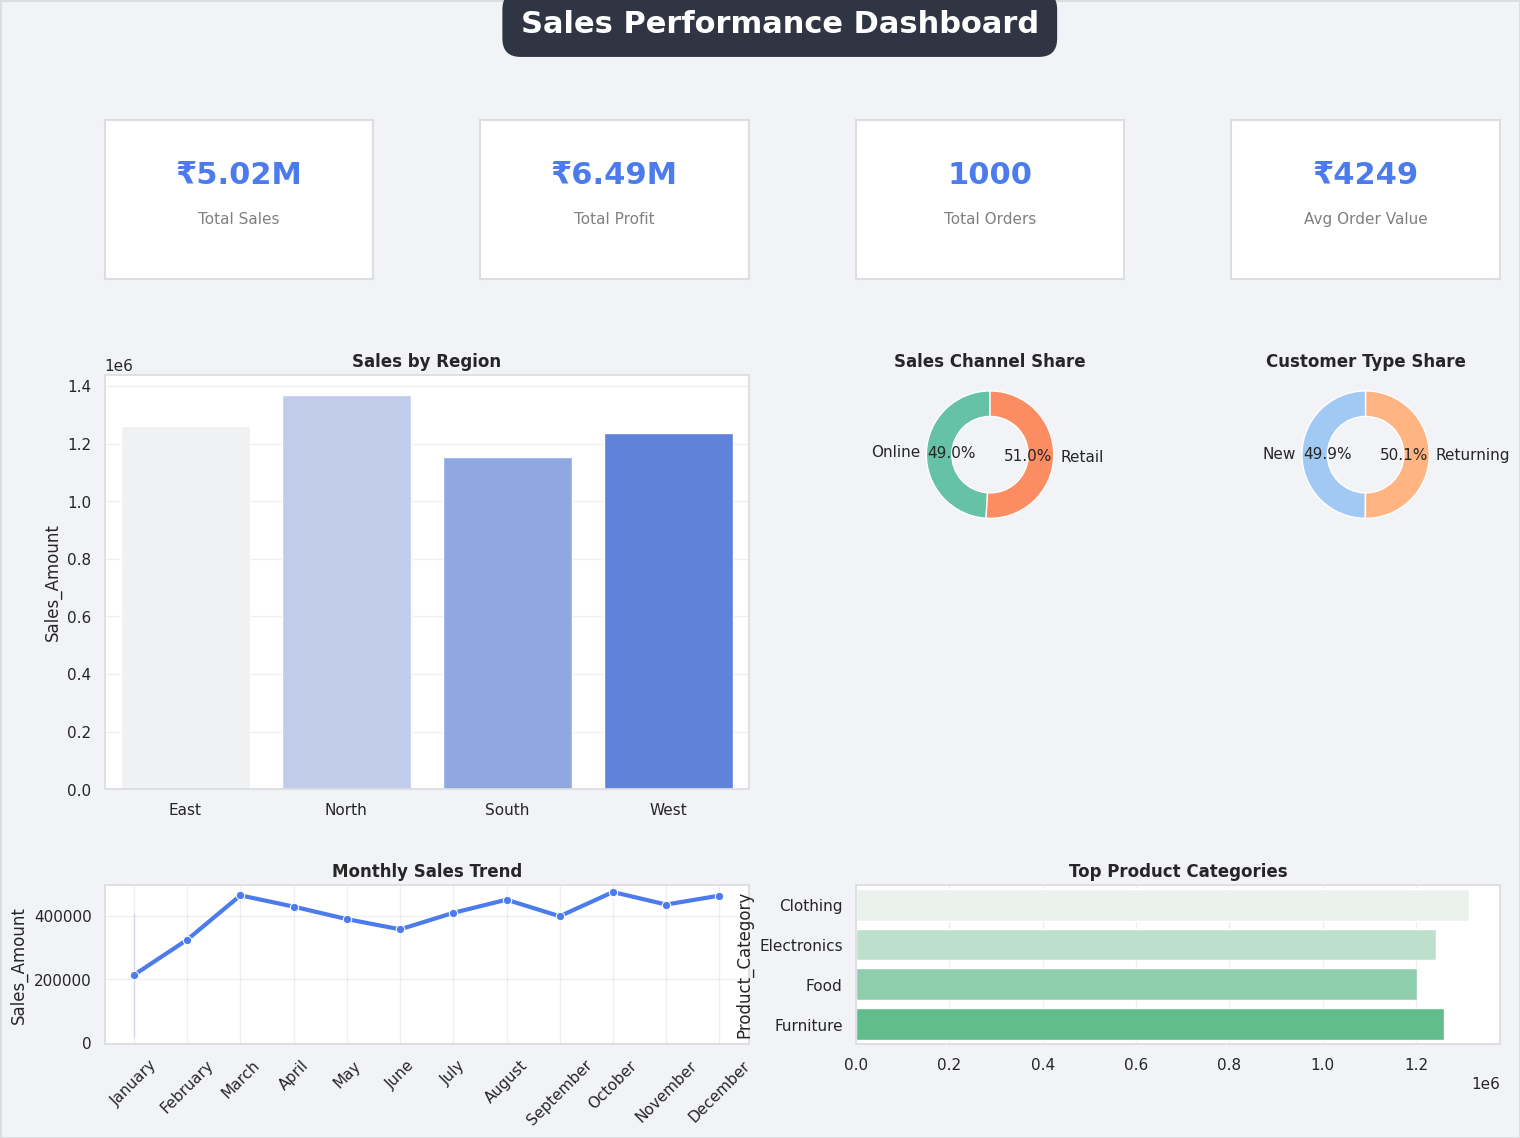

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ================= GLOBAL THEME =================
sns.set_theme(style="white")
plt.rcParams.update({
    "figure.figsize": (18, 12),
    "font.size": 11
})

BG_COLOR = "#f2f3f7"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dcdde1"
TITLE_COLOR = "#2f3542"
PRIMARY = "#4b7bec"

fig = plt.figure(facecolor=BG_COLOR)
gs = fig.add_gridspec(4, 4, hspace=0.6, wspace=0.4)

# ================= DASHBOARD BORDER =================
fig.patch.set_edgecolor(BORDER_COLOR)
fig.patch.set_linewidth(2)

# ================= HEADER =================
fig.text(
    0.5, 0.96,
    "Sales Performance Dashboard",
    ha="center",
    va="center",
    fontsize=22,
    fontweight="bold",
    color="white",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor=TITLE_COLOR,
        edgecolor="none"
    )
)

# ================= KPI CARDS =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)

    ax.text(0.5, 0.6, kpi_values[i],
            ha="center", fontsize=22, fontweight="bold", color=PRIMARY)
    ax.text(0.5, 0.35, kpi_titles[i],
            ha="center", fontsize=11, color="gray")

# ================= SALES BY REGION (GRADIENT BAR) =================
ax1 = fig.add_subplot(gs[1:3, 0:2])
ax1.set_facecolor(CARD_COLOR)

colors = sns.light_palette(PRIMARY, n_colors=len(region_kpis))
sns.barplot(
    data=region_kpis,
    x="Region",
    y="Sales_Amount",
    palette=colors,
    ax=ax1
)

ax1.set_title("Sales by Region", fontweight="bold")
ax1.set_xlabel("")
ax1.grid(axis="y", alpha=0.3)

for spine in ax1.spines.values():
    spine.set_edgecolor(BORDER_COLOR)

# ================= DONUT: SALES CHANNEL =================
ax2 = fig.add_subplot(gs[1, 2])
ax2.set_facecolor(CARD_COLOR)

ax2.pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set2"),
    wedgeprops=dict(width=0.4)
)
ax2.set_title("Sales Channel Share", fontweight="bold")

for spine in ax2.spines.values():
    spine.set_edgecolor(BORDER_COLOR)

# ================= DONUT: CUSTOMER TYPE =================
ax3 = fig.add_subplot(gs[1, 3])
ax3.set_facecolor(CARD_COLOR)

ax3.pie(
    customer_sales["Sales_Amount"],
    labels=customer_sales["Customer_Type"],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel"),
    wedgeprops=dict(width=0.4)
)
ax3.set_title("Customer Type Share", fontweight="bold")

for spine in ax3.spines.values():
    spine.set_edgecolor(BORDER_COLOR)

# ================= MONTHLY SALES TREND =================
ax4 = fig.add_subplot(gs[3, 0:2])
ax4.set_facecolor(CARD_COLOR)

sns.lineplot(
    data=monthly_sales,
    x="Month_Name",
    y="Sales_Amount",
    marker="o",
    linewidth=3,
    color=PRIMARY,
    ax=ax4
)

ax4.set_title("Monthly Sales Trend", fontweight="bold")
ax4.set_xlabel("")
ax4.tick_params(axis="x", rotation=45)
ax4.grid(alpha=0.3)

for spine in ax4.spines.values():
    spine.set_edgecolor(BORDER_COLOR)

# ================= TOP PRODUCTS =================
ax5 = fig.add_subplot(gs[3, 2:4])
ax5.set_facecolor(CARD_COLOR)

colors = sns.light_palette("#20bf6b", n_colors=5)
sns.barplot(
    data=product_sales.head(5),
    x="Sales_Amount",
    y="Product_Category",
    palette=colors,
    ax=ax5
)

ax5.set_title("Top Product Categories", fontweight="bold")
ax5.set_xlabel("")
ax5.grid(axis="x", alpha=0.3)

for spine in ax5.spines.values():
    spine.set_edgecolor(BORDER_COLOR)

plt.show()


/tmp/ipython-input-688539622.py:137: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


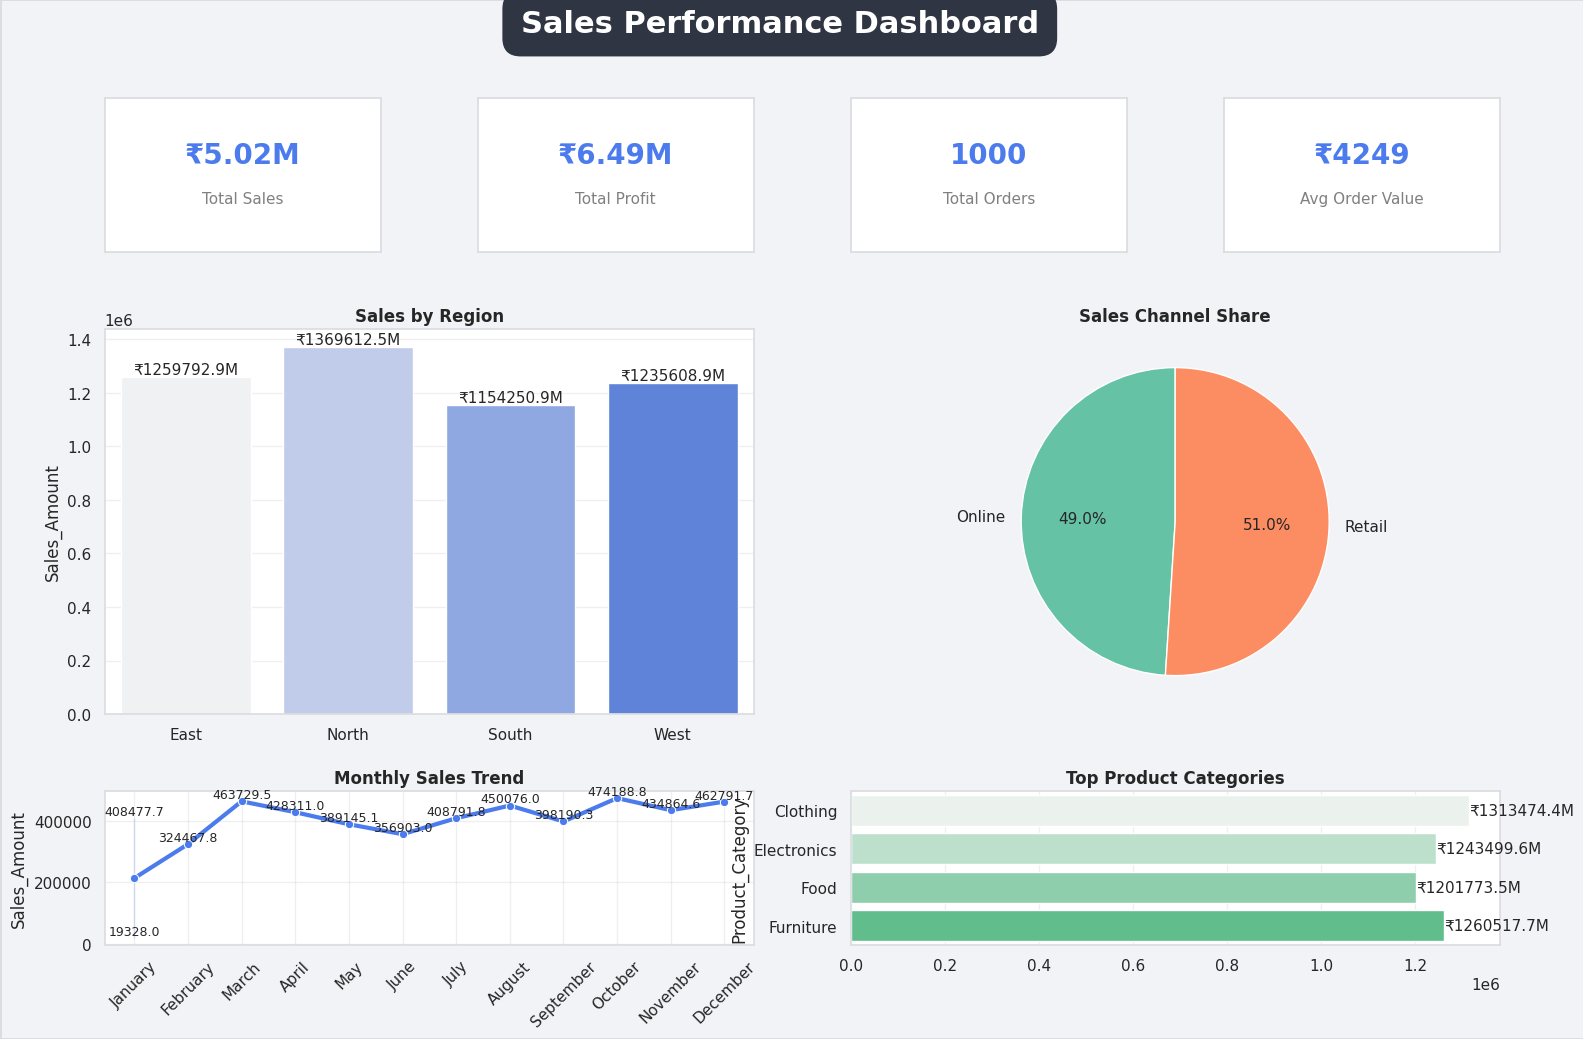

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ================= GLOBAL STYLE =================
sns.set_theme(style="white")
plt.rcParams.update({
    "figure.figsize": (18, 11),
    "font.size": 11
})

BG_COLOR = "#f2f3f7"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dcdde1"
TITLE_COLOR = "#2f3542"
PRIMARY = "#4b7bec"

fig = plt.figure(facecolor=BG_COLOR)
gs = fig.add_gridspec(4, 4, hspace=0.5, wspace=0.35)

# ================= DASHBOARD BORDER =================
fig.patch.set_edgecolor(BORDER_COLOR)
fig.patch.set_linewidth(2)

# ================= HEADER (MOVED DOWN) =================
fig.text(
    0.5, 0.94,
    "Sales Performance Dashboard",
    ha="center",
    fontsize=22,
    fontweight="bold",
    color="white",
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor=TITLE_COLOR,
        edgecolor="none"
    )
)

# ================= KPI CARDS (COMPACT) =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])

    for s in ax.spines.values():
        s.set_edgecolor(BORDER_COLOR)
        s.set_linewidth(1.3)

    ax.text(0.5, 0.58, kpi_values[i],
            ha="center", fontsize=20, fontweight="bold", color=PRIMARY)
    ax.text(0.5, 0.32, kpi_titles[i],
            ha="center", fontsize=11, color="gray")

# ================= SALES BY REGION (GRADIENT + LABELS) =================
ax1 = fig.add_subplot(gs[1:3, 0:2])
ax1.set_facecolor(CARD_COLOR)

palette = sns.light_palette(PRIMARY, n_colors=len(region_kpis))
sns.barplot(
    data=region_kpis,
    x="Region",
    y="Sales_Amount",
    hue="Region",
    palette=palette,
    legend=False,
    ax=ax1
)

ax1.set_title("Sales by Region", fontweight="bold")
ax1.set_xlabel("")
ax1.grid(axis="y", alpha=0.3)

for container in ax1.containers:
    ax1.bar_label(container, fmt="₹%.1fM", label_type="edge")

for s in ax1.spines.values():
    s.set_edgecolor(BORDER_COLOR)

# ================= DONUT: SALES CHANNEL (BIGGER) =================
ax2 = fig.add_subplot(gs[1:3, 2:4])
ax2.set_facecolor(CARD_COLOR)

wedges, texts, autotexts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=channel_sales["Sales_Channel"],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Set2"),
    # wedgeprops=dict(width=0.45)
)

ax2.set_title("Sales Channel Share", fontweight="bold")

for s in ax2.spines.values():
    s.set_edgecolor(BORDER_COLOR)

# ================= MONTHLY SALES TREND (LABELS ADDED) =================
ax3 = fig.add_subplot(gs[3, 0:2])
ax3.set_facecolor(CARD_COLOR)

sns.lineplot(
    data=monthly_sales,
    x="Month_Name",
    y="Sales_Amount",
    marker="o",
    linewidth=3,
    color=PRIMARY,
    ax=ax3
)

ax3.set_title("Monthly Sales Trend", fontweight="bold")
ax3.set_xlabel("")
ax3.tick_params(axis="x", rotation=45)
ax3.grid(alpha=0.3)

for x, y in zip(monthly_sales["Month_Name"], monthly_sales["Sales_Amount"]):
    ax3.text(x, y, f"{y:.1f}", ha="center", va="bottom", fontsize=9)

for s in ax3.spines.values():
    s.set_edgecolor(BORDER_COLOR)

# ================= TOP PRODUCT CATEGORIES =================
ax4 = fig.add_subplot(gs[3, 2:4])
ax4.set_facecolor(CARD_COLOR)

palette2 = sns.light_palette("#20bf6b", n_colors=5)
sns.barplot(
    data=product_sales.head(5),
    x="Sales_Amount",
    y="Product_Category",
    hue="Product_Category",
    palette=palette2,
    legend=False,
    ax=ax4
)

ax4.set_title("Top Product Categories", fontweight="bold")
ax4.set_xlabel("")
ax4.grid(axis="x", alpha=0.3)

for container in ax4.containers:
    ax4.bar_label(container, fmt="₹%.1fM")

for s in ax4.spines.values():
    s.set_edgecolor(BORDER_COLOR)

plt.show()


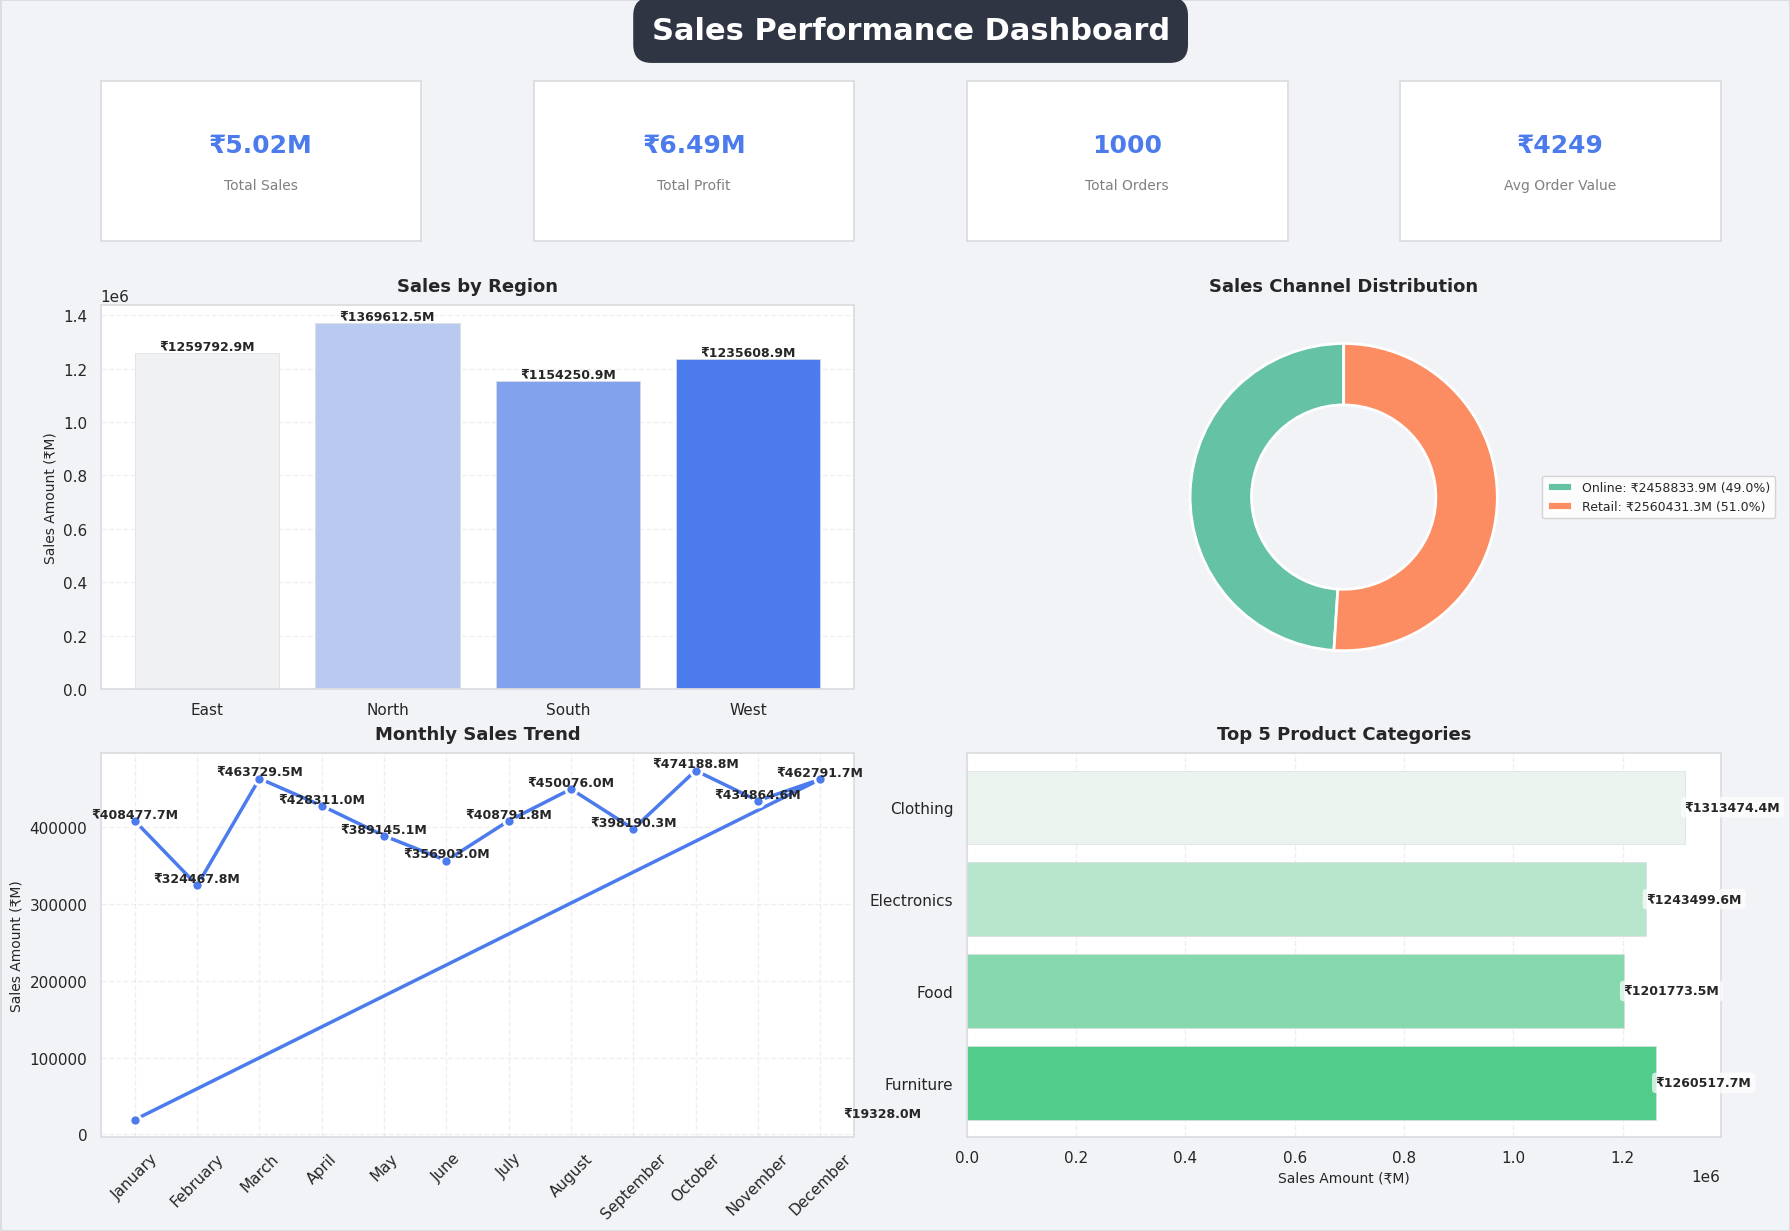

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ================= GLOBAL STYLE =================
sns.set_theme(style="white")
plt.rcParams.update({
    "figure.figsize": (18, 12),
    "font.size": 11
})

BG_COLOR = "#f2f3f7"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dcdde1"
TITLE_COLOR = "#2f3542"
PRIMARY = "#4b7bec"

fig = plt.figure(facecolor=BG_COLOR)
gs = fig.add_gridspec(5, 4, hspace=0.4, wspace=0.35, top=0.93, bottom=0.05, left=0.05, right=0.95)

# ================= DASHBOARD BORDER =================
fig.patch.set_edgecolor(BORDER_COLOR)
fig.patch.set_linewidth(2)

# ================= HEADER (SEPARATE FROM DASHBOARD) =================
header_ax = fig.add_axes([0.25, 0.955, 0.5, 0.035])
header_ax.axis('off')
header_ax.text(
    0.5, 0.5,
    "Sales Performance Dashboard",
    ha="center",
    va="center",
    fontsize=22,
    fontweight="bold",
    color="white",
    transform=header_ax.transAxes,
    bbox=dict(
        boxstyle="round,pad=0.6",
        facecolor=TITLE_COLOR,
        edgecolor="none"
    )
)

# ================= KPI CARDS (COMPACT) =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    for s in ax.spines.values():
        s.set_edgecolor(BORDER_COLOR)
        s.set_linewidth(1.3)

    ax.text(0.5, 0.60, kpi_values[i],
            ha="center", va="center", fontsize=18, fontweight="bold", color=PRIMARY)
    ax.text(0.5, 0.35, kpi_titles[i],
            ha="center", va="center", fontsize=10, color="gray")

# ================= SALES BY REGION =================
ax1 = fig.add_subplot(gs[1:3, 0:2])
ax1.set_facecolor(CARD_COLOR)

palette = sns.light_palette(PRIMARY, n_colors=len(region_kpis))
bars = ax1.bar(
    region_kpis["Region"],
    region_kpis["Sales_Amount"],
    color=palette,
    edgecolor=BORDER_COLOR,
    linewidth=0.5
)

ax1.set_title("Sales by Region", fontweight="bold", pad=10, fontsize=13)
ax1.set_xlabel("")
ax1.set_ylabel("Sales Amount (₹M)", fontsize=10)
ax1.grid(axis="y", alpha=0.3, linestyle="--")

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'₹{height:.1f}M',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

for s in ax1.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.3)

# ================= DONUT: SALES CHANNEL =================
ax2 = fig.add_subplot(gs[1:3, 2:4])
ax2.set_facecolor(CARD_COLOR)

colors = sns.color_palette("Set2", n_colors=len(channel_sales))
wedges, texts, autotexts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    autopct='',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor=CARD_COLOR, linewidth=2)
)

ax2.set_title("Sales Channel Distribution", fontweight="bold", pad=10, fontsize=13)

# Create custom legend with percentages
total = channel_sales["Sales_Amount"].sum()
legend_labels = [f"{channel}: ₹{sales:.1f}M ({sales/total*100:.1f}%)"
                 for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"])]
ax2.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

for s in ax2.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.3)

# ================= MONTHLY SALES TREND =================
ax3 = fig.add_subplot(gs[3:5, 0:2])
ax3.set_facecolor(CARD_COLOR)

ax3.plot(
    monthly_sales["Month_Name"],
    monthly_sales["Sales_Amount"],
    marker="o",
    linewidth=2.5,
    color=PRIMARY,
    markersize=8,
    markerfacecolor=PRIMARY,
    markeredgecolor="white",
    markeredgewidth=2
)

ax3.set_title("Monthly Sales Trend", fontweight="bold", pad=10, fontsize=13)
ax3.set_xlabel("")
ax3.set_ylabel("Sales Amount (₹M)", fontsize=10)
ax3.tick_params(axis="x", rotation=45)
ax3.grid(alpha=0.3, linestyle="--")

# Add value labels on points
for i, (x, y) in enumerate(zip(monthly_sales["Month_Name"], monthly_sales["Sales_Amount"])):
    ax3.text(i, y, f'₹{y:.1f}M', ha="center", va="bottom", fontsize=9, fontweight='bold')

for s in ax3.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.3)

# ================= TOP PRODUCT CATEGORIES =================
ax4 = fig.add_subplot(gs[3:5, 2:4])
ax4.set_facecolor(CARD_COLOR)

palette2 = sns.light_palette("#20bf6b", n_colors=5)
bars = ax4.barh(
    product_sales.head(5)["Product_Category"],
    product_sales.head(5)["Sales_Amount"],
    color=palette2,
    edgecolor=BORDER_COLOR,
    linewidth=0.5
)

ax4.set_title("Top 5 Product Categories", fontweight="bold", pad=10, fontsize=13)
ax4.set_xlabel("Sales Amount (₹M)", fontsize=10)
ax4.set_ylabel("")
ax4.grid(axis="x", alpha=0.3, linestyle="--")
ax4.invert_yaxis()

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax4.text(width, bar.get_y() + bar.get_height()/2.,
            f'₹{width:.1f}M',
            ha='left', va='center', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none', alpha=0.7))

for s in ax4.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.3)

plt.show()

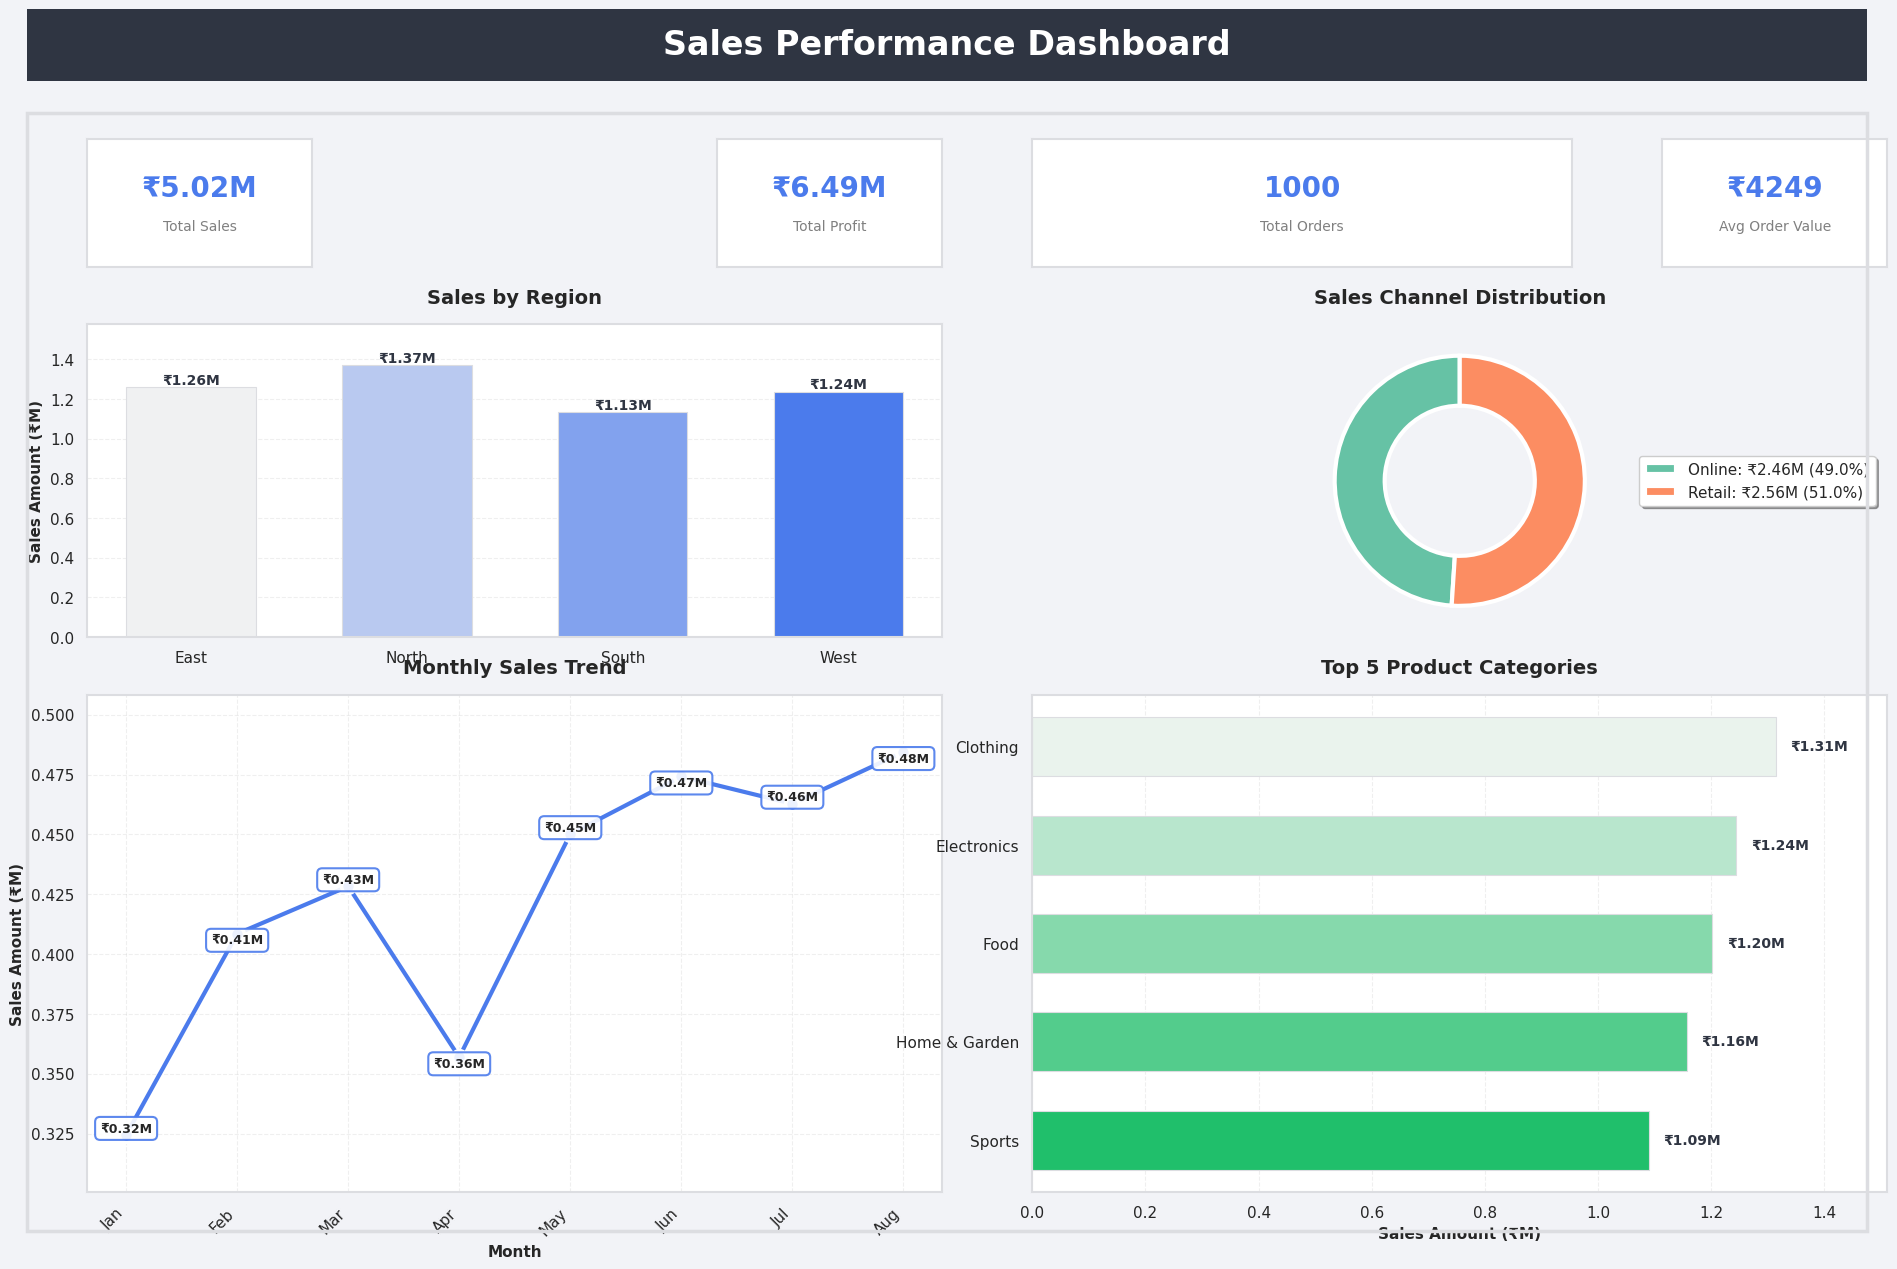

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# ================= SAMPLE DATA (Replace with your actual data) =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= GLOBAL STYLE =================
sns.set_theme(style="white")
plt.rcParams.update({
    "figure.figsize": (20, 13),
    "font.size": 11
})

BG_COLOR = "#f2f3f7"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dcdde1"
TITLE_COLOR = "#2f3542"
PRIMARY = "#4b7bec"

fig = plt.figure(facecolor=BG_COLOR)

# ================= DASHBOARD BORDER (MAIN) =================
dashboard_border = mpatches.Rectangle((0.04, 0.04), 0.92, 0.86,
                                       linewidth=2.5, edgecolor=BORDER_COLOR,
                                       facecolor='none', transform=fig.transFigure, zorder=1)
fig.patches.append(dashboard_border)

# ================= TITLE BORDER (SEPARATE) =================
title_border = mpatches.Rectangle((0.04, 0.925), 0.92, 0.055,
                                   linewidth=0, edgecolor='none',
                                   facecolor=TITLE_COLOR, transform=fig.transFigure, zorder=2)
fig.patches.append(title_border)

# ================= TITLE TEXT =================
fig.text(0.5, 0.9525, "Sales Performance Dashboard",
         ha="center", va="center", fontsize=24, fontweight="bold",
         color="white", zorder=3)

# ================= GRID SETUP =================
gs = fig.add_gridspec(6, 6, hspace=0.45, wspace=0.4,
                      top=0.88, bottom=0.07, left=0.07, right=0.97)

# ================= KPI CARDS (NARROWER) =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

# kpi_positions = [
#     gs[0, 0:1],
#     gs[0, 2:3],
#     gs[0, 3:5],
#     gs[0, 5:6]
# ]
kpi_positions = [
    gs_kpi[0, 0:3],
    gs_kpi[0, 3:6],
    gs_kpi[0, 6:9],
    gs_kpi[0, 9:12]
]



for i in range(4):
    ax = fig.add_subplot(kpi_positions[i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    for s in ax.spines.values():
        s.set_edgecolor(BORDER_COLOR)
        s.set_linewidth(1.5)

    ax.text(0.5, 0.62, kpi_values[i],
            ha="center", va="center", fontsize=20, fontweight="bold", color=PRIMARY)
    ax.text(0.5, 0.32, kpi_titles[i],
            ha="center", va="center", fontsize=10, color="gray")

# ================= SALES BY REGION =================
ax1 = fig.add_subplot(gs[1:3, 0:3])
ax1.set_facecolor(CARD_COLOR)

palette = sns.light_palette(PRIMARY, n_colors=len(region_kpis))
bars = ax1.bar(
    region_kpis["Region"],
    region_kpis["Sales_Amount"],
    color=palette,
    edgecolor=BORDER_COLOR,
    linewidth=0.8,
    width=0.6
)

ax1.set_title("Sales by Region", fontweight="bold", pad=15, fontsize=14)
ax1.set_xlabel("")
ax1.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax1.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.8)
ax1.set_ylim(0, max(region_kpis["Sales_Amount"]) * 1.15)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'₹{height:.2f}M',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color=TITLE_COLOR)

for s in ax1.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= DONUT: SALES CHANNEL =================
ax2 = fig.add_subplot(gs[1:3, 3:6])
ax2.set_facecolor(CARD_COLOR)

colors = sns.color_palette("Set2", n_colors=len(channel_sales))
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=3)
)

ax2.set_title("Sales Channel Distribution", fontweight="bold", pad=15, fontsize=14)

# Create detailed legend
total = channel_sales["Sales_Amount"].sum()
legend_labels = [f"{channel}: ₹{sales:.2f}M ({sales/total*100:.1f}%)"
                 for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"])]
ax2.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1.05, 0.5),
          fontsize=11, frameon=True, fancybox=True, shadow=True)

for s in ax2.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= MONTHLY SALES TREND (IMPROVED WITH ALTERNATING LABELS) =================
ax3 = fig.add_subplot(gs[3:6, 0:3])
ax3.set_facecolor(CARD_COLOR)

# Plot line
ax3.plot(
    range(len(monthly_sales)),
    monthly_sales["Sales_Amount"],
    marker="o",
    linewidth=3,
    color=PRIMARY,
    markersize=10,
    markerfacecolor=PRIMARY,
    markeredgecolor="white",
    markeredgewidth=2.5,
    zorder=3
)

ax3.set_title("Monthly Sales Trend", fontweight="bold", pad=15, fontsize=14)
ax3.set_xlabel("Month", fontsize=11, fontweight="bold")
ax3.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax3.set_xticks(range(len(monthly_sales)))
ax3.set_xticklabels(monthly_sales["Month_Name"], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, linestyle="--", linewidth=0.8)

# Add value labels - alternating above and below to avoid overlap
y_max = monthly_sales["Sales_Amount"].max()
y_min = monthly_sales["Sales_Amount"].min()
y_range = y_max - y_min

for i, (x, y) in enumerate(zip(range(len(monthly_sales)), monthly_sales["Sales_Amount"])):
    # Alternate positions
    if i % 2 == 0:
        offset = y_range * 0.08
        va = 'bottom'
    else:
        offset = -y_range * 0.08
        va = 'top'

    ax3.annotate(f'₹{y:.2f}M',
                xy=(x, y),
                xytext=(0, offset if i % 2 == 0 else offset),
                textcoords='offset points',
                ha='center', va=va,
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                         edgecolor=PRIMARY, linewidth=1.5, alpha=0.9))

ax3.set_ylim(y_min - y_range * 0.15, y_max + y_range * 0.15)

for s in ax3.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= TOP PRODUCT CATEGORIES (IMPROVED) =================
ax4 = fig.add_subplot(gs[3:6, 3:6])
ax4.set_facecolor(CARD_COLOR)

top_products = product_sales.head(5).sort_values('Sales_Amount', ascending=True)
palette2 = sns.light_palette("#20bf6b", n_colors=5, reverse=True)

bars = ax4.barh(
    range(len(top_products)),
    top_products["Sales_Amount"],
    color=palette2,
    edgecolor=BORDER_COLOR,
    linewidth=0.8,
    height=0.6
)

ax4.set_title("Top 5 Product Categories", fontweight="bold", pad=15, fontsize=14)
ax4.set_xlabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax4.set_ylabel("")
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels(top_products["Product_Category"], fontsize=11)
ax4.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.8)

# Add value labels on bars - positioned outside for clarity
max_val = top_products["Sales_Amount"].max()
for i, (bar, val) in enumerate(zip(bars, top_products["Sales_Amount"])):
    width = bar.get_width()
    ax4.text(width + max_val * 0.02, bar.get_y() + bar.get_height()/2.,
            f'₹{val:.2f}M',
            ha='left', va='center', fontsize=10, fontweight='bold',
            color=TITLE_COLOR)

ax4.set_xlim(0, max_val * 1.15)

for s in ax4.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

plt.show()

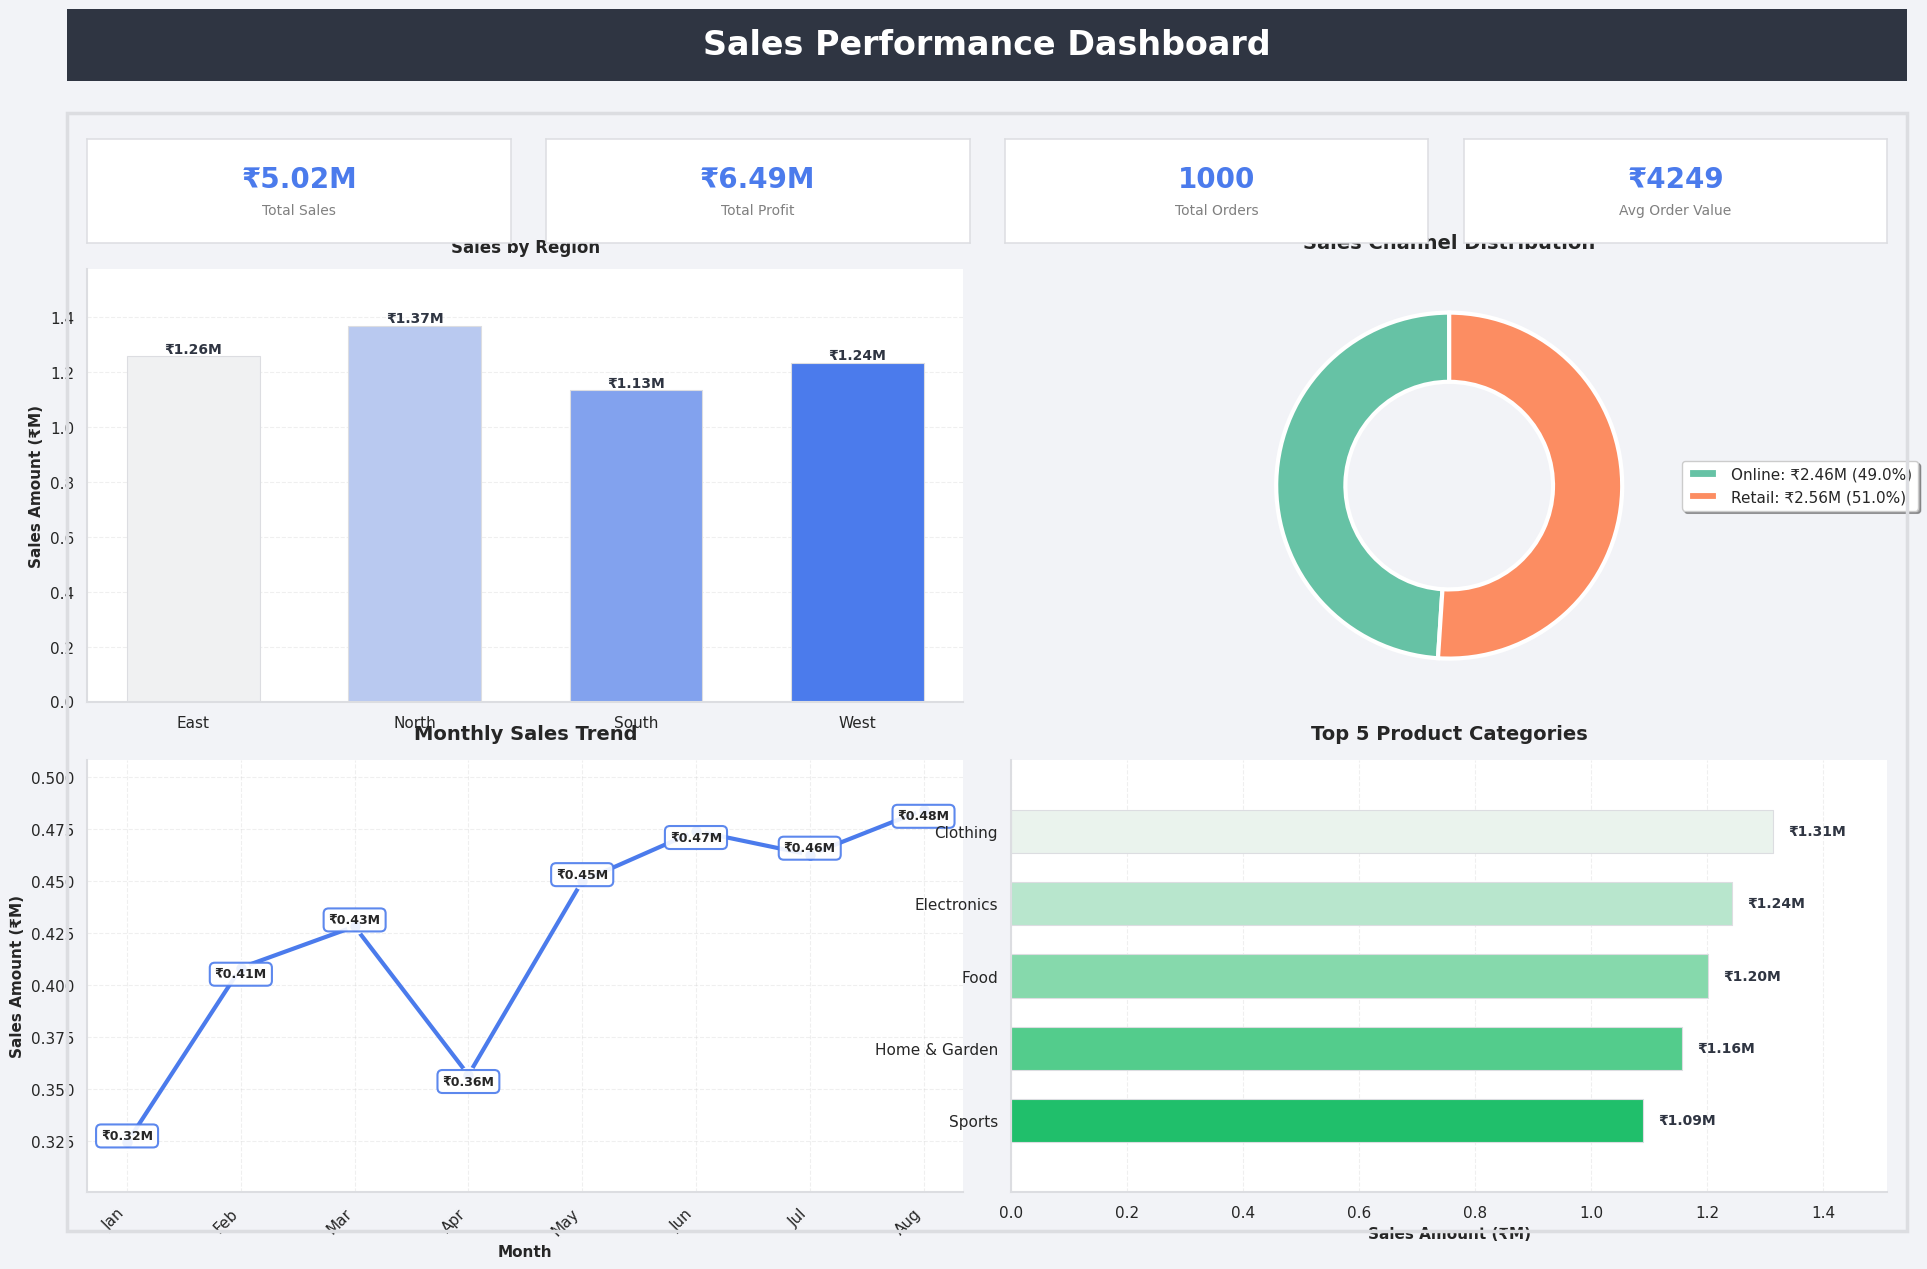

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================= SAMPLE DATA (Replace with your actual data) =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= GLOBAL STYLE =================
sns.set_theme(style="white")
plt.rcParams.update({
    "figure.figsize": (20, 13),
    "font.size": 11
})

BG_COLOR = "#f2f3f7"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dcdde1"
TITLE_COLOR = "#2f3542"
PRIMARY = "#4b7bec"

fig = plt.figure(facecolor=BG_COLOR)

# ================= DASHBOARD BORDER (MAIN) =================
dashboard_border = mpatches.Rectangle((0.04, 0.04), 0.92, 0.86, linewidth=2.5, edgecolor=BORDER_COLOR, facecolor='none', transform=fig.transFigure, zorder=1)
fig.patches.append(dashboard_border)

# ================= TITLE BORDER (SEPARATE) =================
title_border = mpatches.Rectangle((0.04, 0.925), 0.92, 0.055, linewidth=0, edgecolor='none', facecolor=TITLE_COLOR, transform=fig.transFigure, zorder=2)
fig.patches.append(title_border)

# ================= TITLE TEXT =================
fig.text(0.5, 0.9525, "Sales Performance Dashboard", ha="center", va="center", fontsize=24, fontweight="bold", color="white", zorder=3)

# ================= GRID SETUP (8 columns for equal KPI spacing) =================
# gs = fig.add_gridspec(8, 12, hspace=0.5, wspace=0.5,top=0.88, bottom=0.07, left=0.05, right=0.95)
gs_kpi = fig.add_gridspec(
    1, 12,
    left=0.05, right=0.95,
    top=0.88, bottom=0.80,
    wspace=0.3
)
kpi_positions = [
    gs_kpi[0, 0:3],
    gs_kpi[0, 3:6],
    gs_kpi[0, 6:9],
    gs_kpi[0, 9:12]
]

gs_charts = fig.add_gridspec(
    6, 12,
    left=0.05, right=0.95,
    top=0.78, bottom=0.07,
    hspace=0.55,   # ⬅️ increase this
    wspace=0.45    # ⬅️ increase this
)

# ================= KPI CARDS (EQUAL SIZE) =================
kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']}",
    f"₹{top_kpis['Avg_Order_Value']:.0f}"
]

# Equal width positions for charts
# TOP ROW
ax1 = fig.add_subplot(gs_charts[0:3, 0:6])   # Sales by Region
ax2 = fig.add_subplot(gs_charts[0:3, 6:12])  # Sales Channel (Donut)

# BOTTOM ROW
ax3 = fig.add_subplot(gs_charts[3:6, 0:6])   # Monthly Sales Trend
ax4 = fig.add_subplot(gs_charts[3:6, 6:12])  # Top Products

for ax in [ax1, ax2, ax3, ax4]:
    ax.margins(x=0.05, y=0.15)

for i in range(4):
    ax = fig.add_subplot(kpi_positions[i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    for s in ax.spines.values():
        s.set_edgecolor(BORDER_COLOR)
        s.set_linewidth(1.1)

    ax.text(0.5, 0.62, kpi_values[i],
            ha="center", va="center", fontsize=20, fontweight="bold", color=PRIMARY)
    ax.text(0.5, 0.32, kpi_titles[i],
            ha="center", va="center", fontsize=10, color="gray")

# ================= SALES BY REGION =================
# ax1 = fig.add_subplot(gs[1:3, 0:4])
ax1.set_facecolor(CARD_COLOR)

palette = sns.light_palette(PRIMARY, n_colors=len(region_kpis))
bars = ax1.bar(
    region_kpis["Region"],
    region_kpis["Sales_Amount"],
    color=palette,
    edgecolor=BORDER_COLOR,
    linewidth=0.8,
    width=0.6
)

ax1.set_title("Sales by Region", fontweight="bold", pad=12)
ax1.set_xlabel("")
ax1.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax1.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.8)
ax1.set_ylim(0, max(region_kpis["Sales_Amount"]) * 1.15)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'₹{height:.2f}M',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color=TITLE_COLOR)

for s in ax1.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= DONUT: SALES CHANNEL =================
# ax2 = fig.add_subplot(gs[1:3, 4:8])
ax2.set_facecolor(CARD_COLOR)
ax2.set_aspect("equal")
ax2.set_anchor("C")
colors = sns.color_palette("Set2", n_colors=len(channel_sales))
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white', linewidth=3)
)
ax2.legend(
    wedges, legend_labels,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=True
)

ax2.set_title("Sales Channel Distribution", fontweight="bold", pad=15, fontsize=14)

# Create detailed legend
total = channel_sales["Sales_Amount"].sum()
legend_labels = [f"{channel}: ₹{sales:.2f}M ({sales/total*100:.1f}%)"
                 for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"])]
ax2.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1.02, 0.5),
          fontsize=11, frameon=True, fancybox=True, shadow=True)

for s in ax2.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= MONTHLY SALES TREND =================
# ax3 = fig.add_subplot(gs[4:7, 0:4])
ax3.set_facecolor(CARD_COLOR)

# Plot line
ax3.plot(
    range(len(monthly_sales)),
    monthly_sales["Sales_Amount"],
    marker="o",
    linewidth=3,
    color=PRIMARY,
    markersize=10,
    markerfacecolor=PRIMARY,
    markeredgecolor="white",
    markeredgewidth=2.5,
    zorder=3
)

ax3.set_title("Monthly Sales Trend", fontweight="bold", pad=15, fontsize=14)
ax3.set_xlabel("Month", fontsize=11, fontweight="bold")
ax3.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax3.set_xticks(range(len(monthly_sales)))
ax3.set_xticklabels(monthly_sales["Month_Name"], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, linestyle="--", linewidth=0.8)

# Add value labels - alternating above and below to avoid overlap
y_max = monthly_sales["Sales_Amount"].max()
y_min = monthly_sales["Sales_Amount"].min()
y_range = y_max - y_min

for i, (x, y) in enumerate(zip(range(len(monthly_sales)), monthly_sales["Sales_Amount"])):
    # Alternate positions
    if i % 2 == 0:
        offset = y_range * 0.08
        va = 'bottom'
    else:
        offset = -y_range * 0.08
        va = 'top'

    ax3.annotate(f'₹{y:.2f}M',
                xy=(x, y),
                xytext=(0, offset if i % 2 == 0 else offset),
                textcoords='offset points',
                ha='center', va=va,
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                         edgecolor=PRIMARY, linewidth=1.5, alpha=0.9))

ax3.set_ylim(y_min - y_range * 0.15, y_max + y_range * 0.15)

for s in ax3.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= TOP PRODUCT CATEGORIES =================
# ax4 = fig.add_subplot(gs[4:7, 4:8])
ax4.set_facecolor(CARD_COLOR)

top_products = product_sales.head(5).sort_values('Sales_Amount', ascending=True)
palette2 = sns.light_palette("#20bf6b", n_colors=5, reverse=True)

bars = ax4.barh(
    range(len(top_products)),
    top_products["Sales_Amount"],
    color=palette2,
    edgecolor=BORDER_COLOR,
    linewidth=0.8,
    height=0.6
)

ax4.set_title("Top 5 Product Categories", fontweight="bold", pad=15, fontsize=14)
ax4.set_xlabel("Sales Amount (₹M)", fontsize=11, fontweight="bold")
ax4.set_ylabel("")
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels(top_products["Product_Category"], fontsize=11)
ax4.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.8)

# Add value labels on bars - positioned outside for clarity
max_val = top_products["Sales_Amount"].max()
for i, (bar, val) in enumerate(zip(bars, top_products["Sales_Amount"])):
    width = bar.get_width()
    ax4.text(width + max_val * 0.02, bar.get_y() + bar.get_height()/2.,
            f'₹{val:.2f}M',
            ha='left', va='center', fontsize=10, fontweight='bold',
            color=TITLE_COLOR)

ax4.set_xlim(0, max_val * 1.15)

for s in ax4.spines.values():
    s.set_edgecolor(BORDER_COLOR)
    s.set_linewidth(1.5)

# ================= REMOVE EXTRA TOP & RIGHT BORDERS =================
for ax in [ax1, ax2, ax3, ax4]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.show()

/tmp/ipython-input-2082571997.py:414: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])


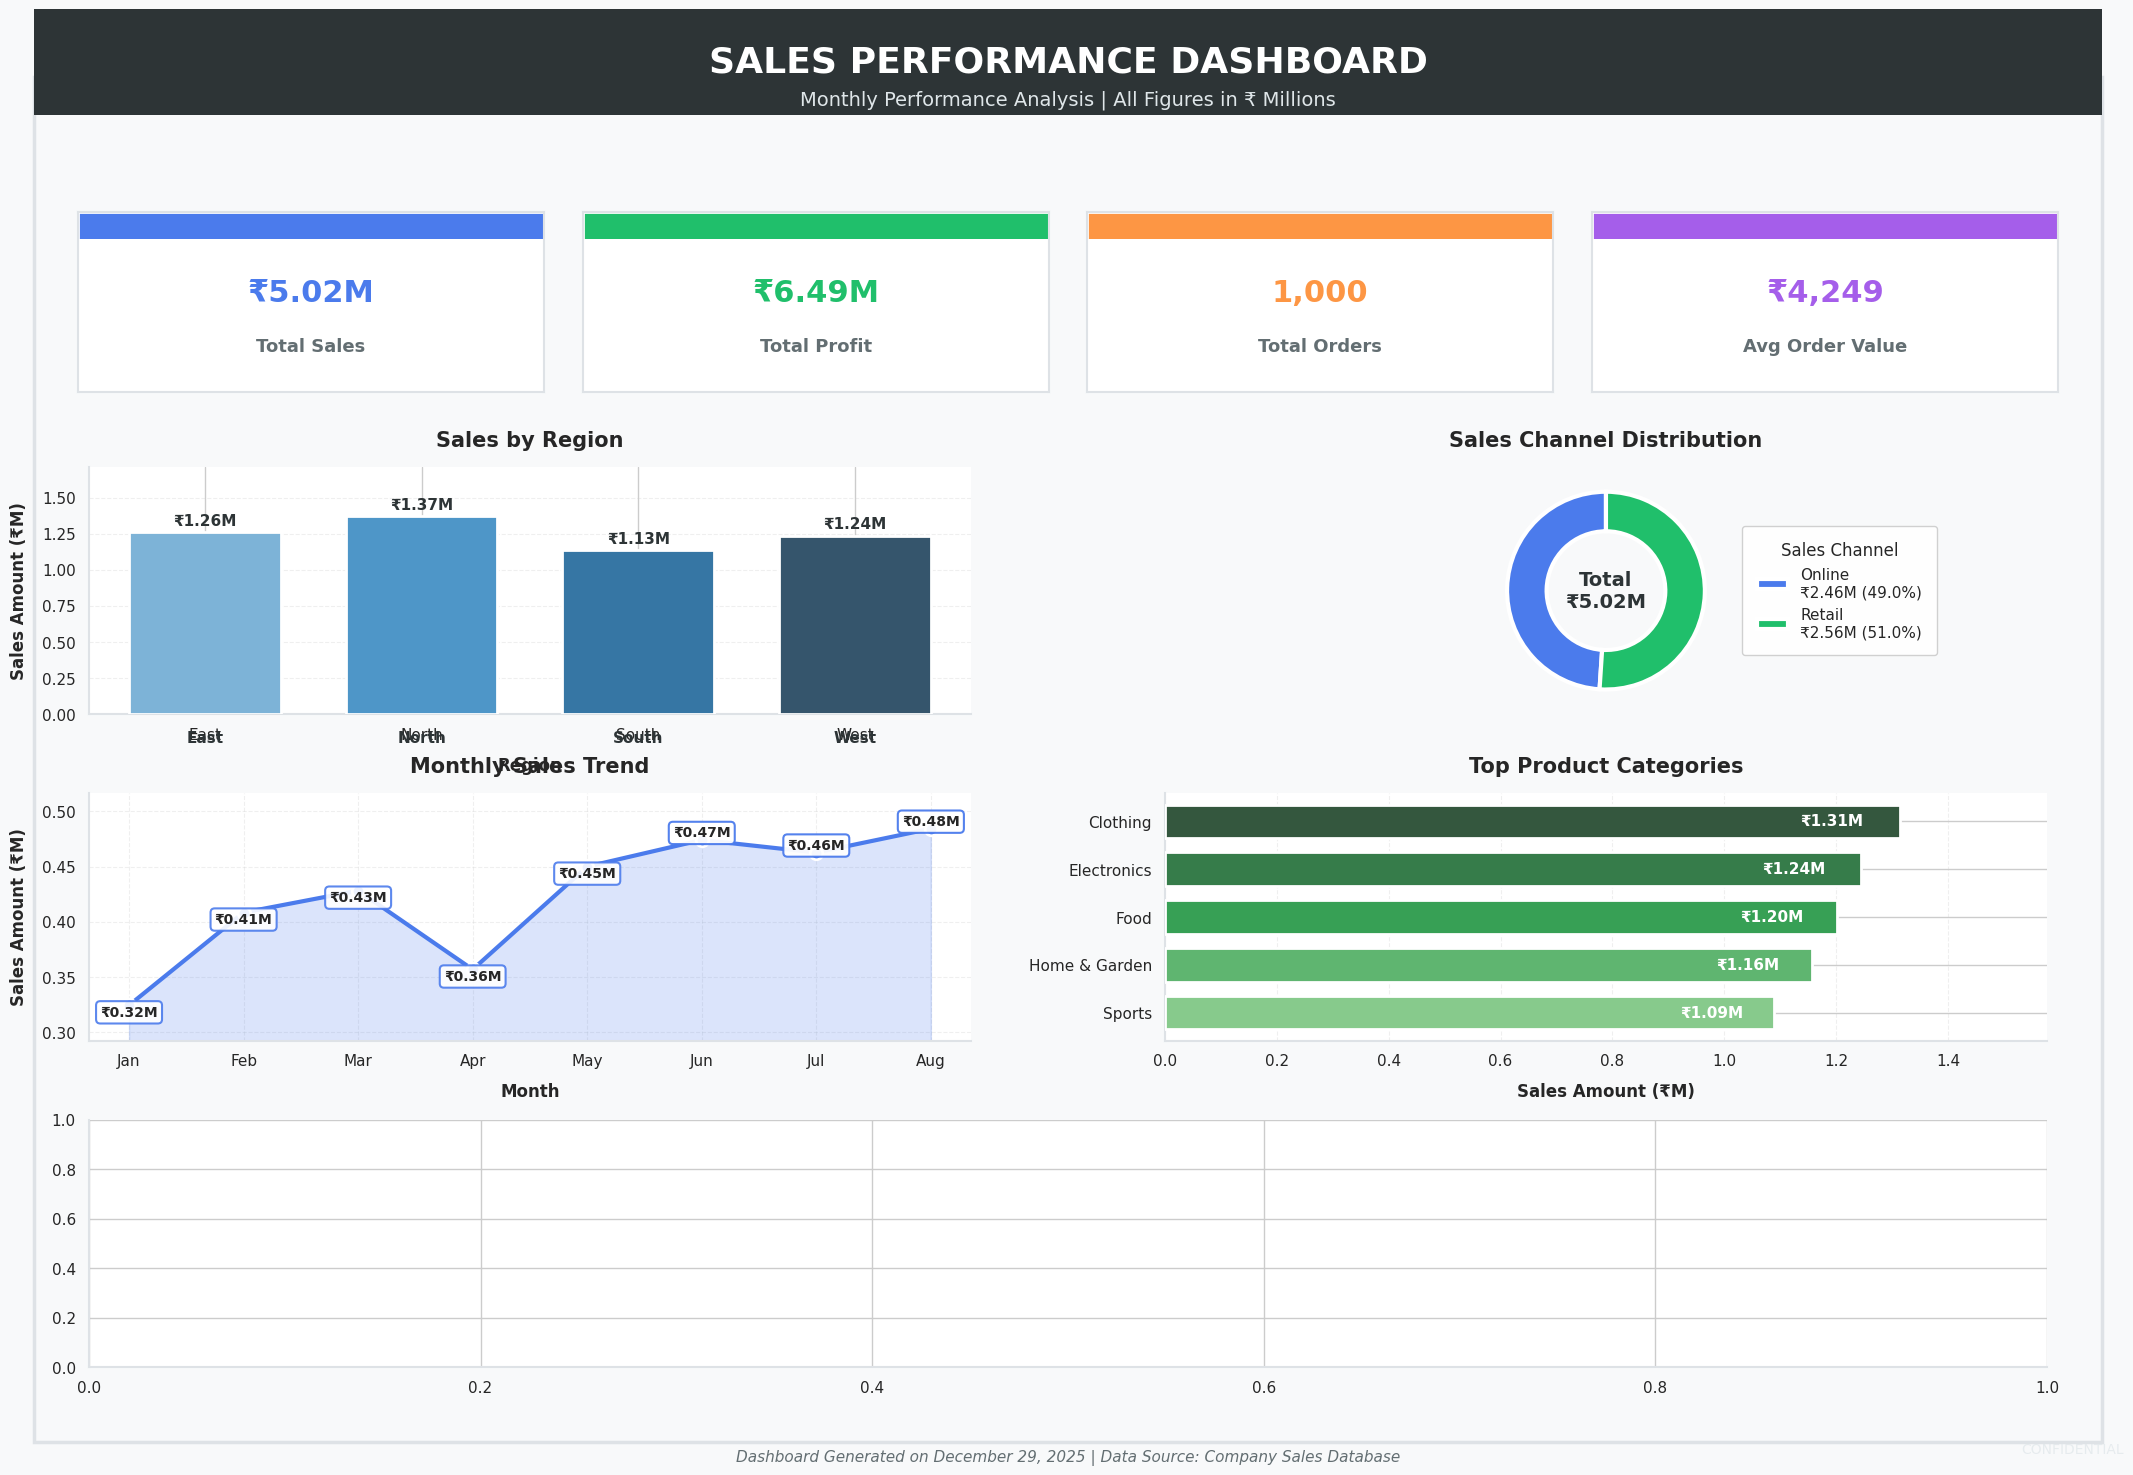

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# ================= SAMPLE DATA (Replace with your actual data) =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= GLOBAL STYLE =================
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (22, 15),
    "font.size": 11,
    "font.family": "sans-serif",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 16,
    "axes.labelweight": "bold",
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.titlesize": 16,
    "figure.titleweight": "bold"
})

BG_COLOR = "#f8f9fa"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dee2e6"
TITLE_COLOR = "#2d3436"
PRIMARY = "#4b7bec"
SECONDARY = "#20bf6b"
TERTIARY = "#fd9644"
QUATERNARY = "#a55eea"

fig = plt.figure(facecolor=BG_COLOR, tight_layout=False)

# ================= DASHBOARD BORDER (MAIN) =================
dashboard_border = mpatches.Rectangle(
    (0.03, 0.03), 0.94, 0.91,
    linewidth=2.5,
    edgecolor=BORDER_COLOR,
    facecolor='none',
    transform=fig.transFigure,
    zorder=1
)
fig.patches.append(dashboard_border)

# ================= HEADER SECTION =================
header_border = mpatches.Rectangle(
    (0.03, 0.915), 0.94, 0.07,
    linewidth=0,
    edgecolor='none',
    facecolor=TITLE_COLOR,
    transform=fig.transFigure,
    zorder=2
)
fig.patches.append(header_border)

# Dashboard title
fig.text(
    0.5, 0.95,
    "SALES PERFORMANCE DASHBOARD",
    ha="center", va="center",
    fontsize=26, fontweight="bold",
    color="white", zorder=3
)

# Subtitle
fig.text(
    0.5, 0.925,
    "Monthly Performance Analysis | All Figures in ₹ Millions",
    ha="center", va="center",
    fontsize=14, fontweight="normal",
    color="#dfe6e9", zorder=3
)

# ================= KPI SECTION =================
# Create a separate grid for KPIs at the top
gs_kpi = fig.add_gridspec(
    1, 12,
    left=0.05, right=0.95,
    top=0.85, bottom=0.73,  # Moved down to give more space
    wspace=0.3
)

kpi_positions = [
    gs_kpi[0, 0:3],
    gs_kpi[0, 3:6],
    gs_kpi[0, 6:9],
    gs_kpi[0, 9:12]
]

kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']:,}",
    f"₹{top_kpis['Avg_Order_Value']:,.0f}"
]
kpi_colors = [PRIMARY, SECONDARY, TERTIARY, QUATERNARY]

for i in range(4):
    ax = fig.add_subplot(kpi_positions[i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Add colored bar at top
    bar_patch = mpatches.Rectangle(
        (0, 0.85), 1, 0.15,
        facecolor=kpi_colors[i],
        edgecolor='none',
        transform=ax.transData
    )
    ax.add_patch(bar_patch)

    # Style the border
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)

    # KPI value
    ax.text(0.5, 0.55, kpi_values[i],
            ha="center", va="center",
            fontsize=22, fontweight="bold",
            color=kpi_colors[i])

    # KPI title
    ax.text(0.5, 0.25, kpi_titles[i],
            ha="center", va="center",
            fontsize=13, fontweight="bold",
            color="#636e72")

    # Add subtle shadow/glow effect
    ax.add_patch(mpatches.Rectangle(
        (0, 0), 1, 1,
        linewidth=2,
        edgecolor='white',
        facecolor='none',
        transform=ax.transData
    ))

# ================= CHART SECTION =================
# Adjusted grid for charts with more space
gs_charts = fig.add_gridspec(
    3, 2,  # 3 rows, 2 columns
    left=0.055, right=0.945,
    top=0.68, bottom=0.08,  # More space from KPIs
    hspace=0.32,  # Increased horizontal space
    wspace=0.22   # Increased vertical space
)

# Create chart axes
ax1 = fig.add_subplot(gs_charts[0, 0])  # Sales by Region
ax2 = fig.add_subplot(gs_charts[0, 1])  # Sales Channel (Donut)
ax3 = fig.add_subplot(gs_charts[1, 0])  # Monthly Sales Trend
ax4 = fig.add_subplot(gs_charts[1, 1])  # Top Products
ax5 = fig.add_subplot(gs_charts[2, :])  # Combined Insights (new)

# Apply consistent styling to all chart axes
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_facecolor(CARD_COLOR)
    # Style borders
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)
    # Remove top and right borders for cleaner look
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# ================= CHART 1: SALES BY REGION =================
ax1.set_title("Sales by Region", fontsize=15, fontweight="bold", pad=15)

# Create gradient colors
region_colors = sns.color_palette("Blues_d", n_colors=len(region_kpis))
bars = ax1.bar(
    region_kpis["Region"],
    region_kpis["Sales_Amount"],
    color=region_colors,
    edgecolor='white',
    linewidth=2,
    width=0.7,
    zorder=3
)

ax1.set_xlabel("Region", fontweight="bold", labelpad=10)
ax1.set_ylabel("Sales Amount (₹M)", fontweight="bold", labelpad=10)
ax1.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.8, zorder=0)
ax1.set_ylim(0, max(region_kpis["Sales_Amount"]) * 1.25)

# Add value labels with better positioning
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + max(region_kpis["Sales_Amount"]) * 0.02,
        f'₹{height:.2f}M',
        ha='center', va='bottom',
        fontsize=11, fontweight='bold',
        color=TITLE_COLOR
    )

# Add data labels at the bottom
for i, (region, sales) in enumerate(zip(region_kpis["Region"], region_kpis["Sales_Amount"])):
    ax1.text(
        i, -max(region_kpis["Sales_Amount"]) * 0.08,
        region,
        ha='center', va='top',
        fontsize=11, fontweight='bold',
        color=TITLE_COLOR
    )

# ================= CHART 2: SALES CHANNEL DISTRIBUTION =================
ax2.set_title("Sales Channel Distribution", fontsize=15, fontweight="bold", pad=15)
ax2.set_aspect("equal")

# Create donut chart
colors = [PRIMARY, SECONDARY]
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=3,
        antialiased=True
    ),
    autopct=None,
    pctdistance=0.85
)

# Create detailed legend with percentages
total = channel_sales["Sales_Amount"].sum()
legend_labels = []
for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"]):
    percentage = sales/total * 100
    legend_labels.append(f"{channel}\n₹{sales:.2f}M ({percentage:.1f}%)")

# Position legend properly
ax2.legend(
    wedges, legend_labels,
    title="Sales Channel",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    borderpad=1,
    title_fontsize=12
)

# Add center text
center_text = f"Total\n₹{total:.2f}M"
ax2.text(0, 0, center_text,
         ha='center', va='center',
         fontsize=14, fontweight='bold',
         color=TITLE_COLOR)

# ================= CHART 3: MONTHLY SALES TREND =================
ax3.set_title("Monthly Sales Trend", fontsize=15, fontweight="bold", pad=15)

# Plot line with gradient fill
x = range(len(monthly_sales))
y = monthly_sales["Sales_Amount"]
ax3.plot(
    x, y,
    marker="o",
    linewidth=3,
    color=PRIMARY,
    markersize=9,
    markerfacecolor=PRIMARY,
    markeredgecolor="white",
    markeredgewidth=2,
    zorder=3
)

# Add gradient fill under the line
ax3.fill_between(x, y, alpha=0.2, color=PRIMARY, zorder=2)

ax3.set_xlabel("Month", fontweight="bold", labelpad=10)
ax3.set_ylabel("Sales Amount (₹M)", fontweight="bold", labelpad=10)
ax3.set_xticks(x)
ax3.set_xticklabels(monthly_sales["Month_Name"], rotation=0, ha='center')
ax3.grid(True, alpha=0.3, linestyle="--", linewidth=0.8)

# Calculate dynamic positioning for annotations
y_max = y.max()
y_min = y.min()
y_range = y_max - y_min

# Add value labels with smart positioning
for i, (x_val, y_val) in enumerate(zip(x, y)):
    # Determine if label should go above or below
    is_peak = y_val > np.percentile(y, 70)
    if is_peak:
        offset = y_range * 0.1
        va = 'bottom'
        bbox_alpha = 0.95
    else:
        offset = -y_range * 0.1
        va = 'top'
        bbox_alpha = 0.9

    ax3.annotate(f'₹{y_val:.2f}M',
                xy=(x_val, y_val),
                xytext=(0, offset),
                textcoords='offset points',
                ha='center', va=va,
                fontsize=10, fontweight='bold',
                bbox=dict(
                    boxstyle='round,pad=0.3',
                    facecolor='white',
                    edgecolor=PRIMARY,
                    linewidth=1.5,
                    alpha=bbox_alpha
                ),
                zorder=4)

ax3.set_ylim(y_min - y_range * 0.2, y_max + y_range * 0.2)

# ================= CHART 4: TOP PRODUCT CATEGORIES =================
ax4.set_title("Top Product Categories", fontsize=15, fontweight="bold", pad=15)

# Sort and prepare data
top_products = product_sales.sort_values('Sales_Amount', ascending=True)
bar_colors = sns.color_palette("Greens_d", n_colors=len(top_products))

bars = ax4.barh(
    range(len(top_products)),
    top_products["Sales_Amount"],
    color=bar_colors,
    edgecolor='white',
    linewidth=2,
    height=0.7,
    zorder=3
)

ax4.set_xlabel("Sales Amount (₹M)", fontweight="bold", labelpad=10)
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels(top_products["Product_Category"], fontsize=11)
ax4.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.8, zorder=0)

# Add value labels inside bars for better readability
max_val = top_products["Sales_Amount"].max()
for bar, val in zip(bars, top_products["Sales_Amount"]):
    width = bar.get_width()
    # Place text inside bar if there's enough space, otherwise outside
    if width > max_val * 0.15:
        text_x = width * 0.95
        text_color = 'white'
        ha = 'right'
    else:
        text_x = width + max_val * 0.02
        text_color = TITLE_COLOR
        ha = 'left'

    ax4.text(
        text_x,
        bar.get_y() + bar.get_height()/2.,
        f'₹{val:.2f}M',
        ha=ha, va='center',
        fontsize=11, fontweight='bold',
        color=text_color
    )

ax4.set_xlim(0, max_val * 1.2)

# ================= FOOTER =================
fig.text(
    0.5, 0.02,
    "Dashboard Generated on " + pd.Timestamp.now().strftime("%B %d, %Y") +
    " | Data Source: Company Sales Database",
    ha="center", va="center",
    fontsize=11,
    color="#636e72",
    style="italic"
)

# ================= FINAL TOUCHES =================
# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])

# Add watermark
fig.text(
    0.98, 0.02,
    "CONFIDENTIAL",
    ha="right", va="bottom",
    fontsize=10,
    color="#dfe6e9",
    alpha=0.7,
    rotation=0
)

# Display the dashboard
plt.show()

ValueError: 'transform' is not allowed as a keyword argument; axhline generates its own transform.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


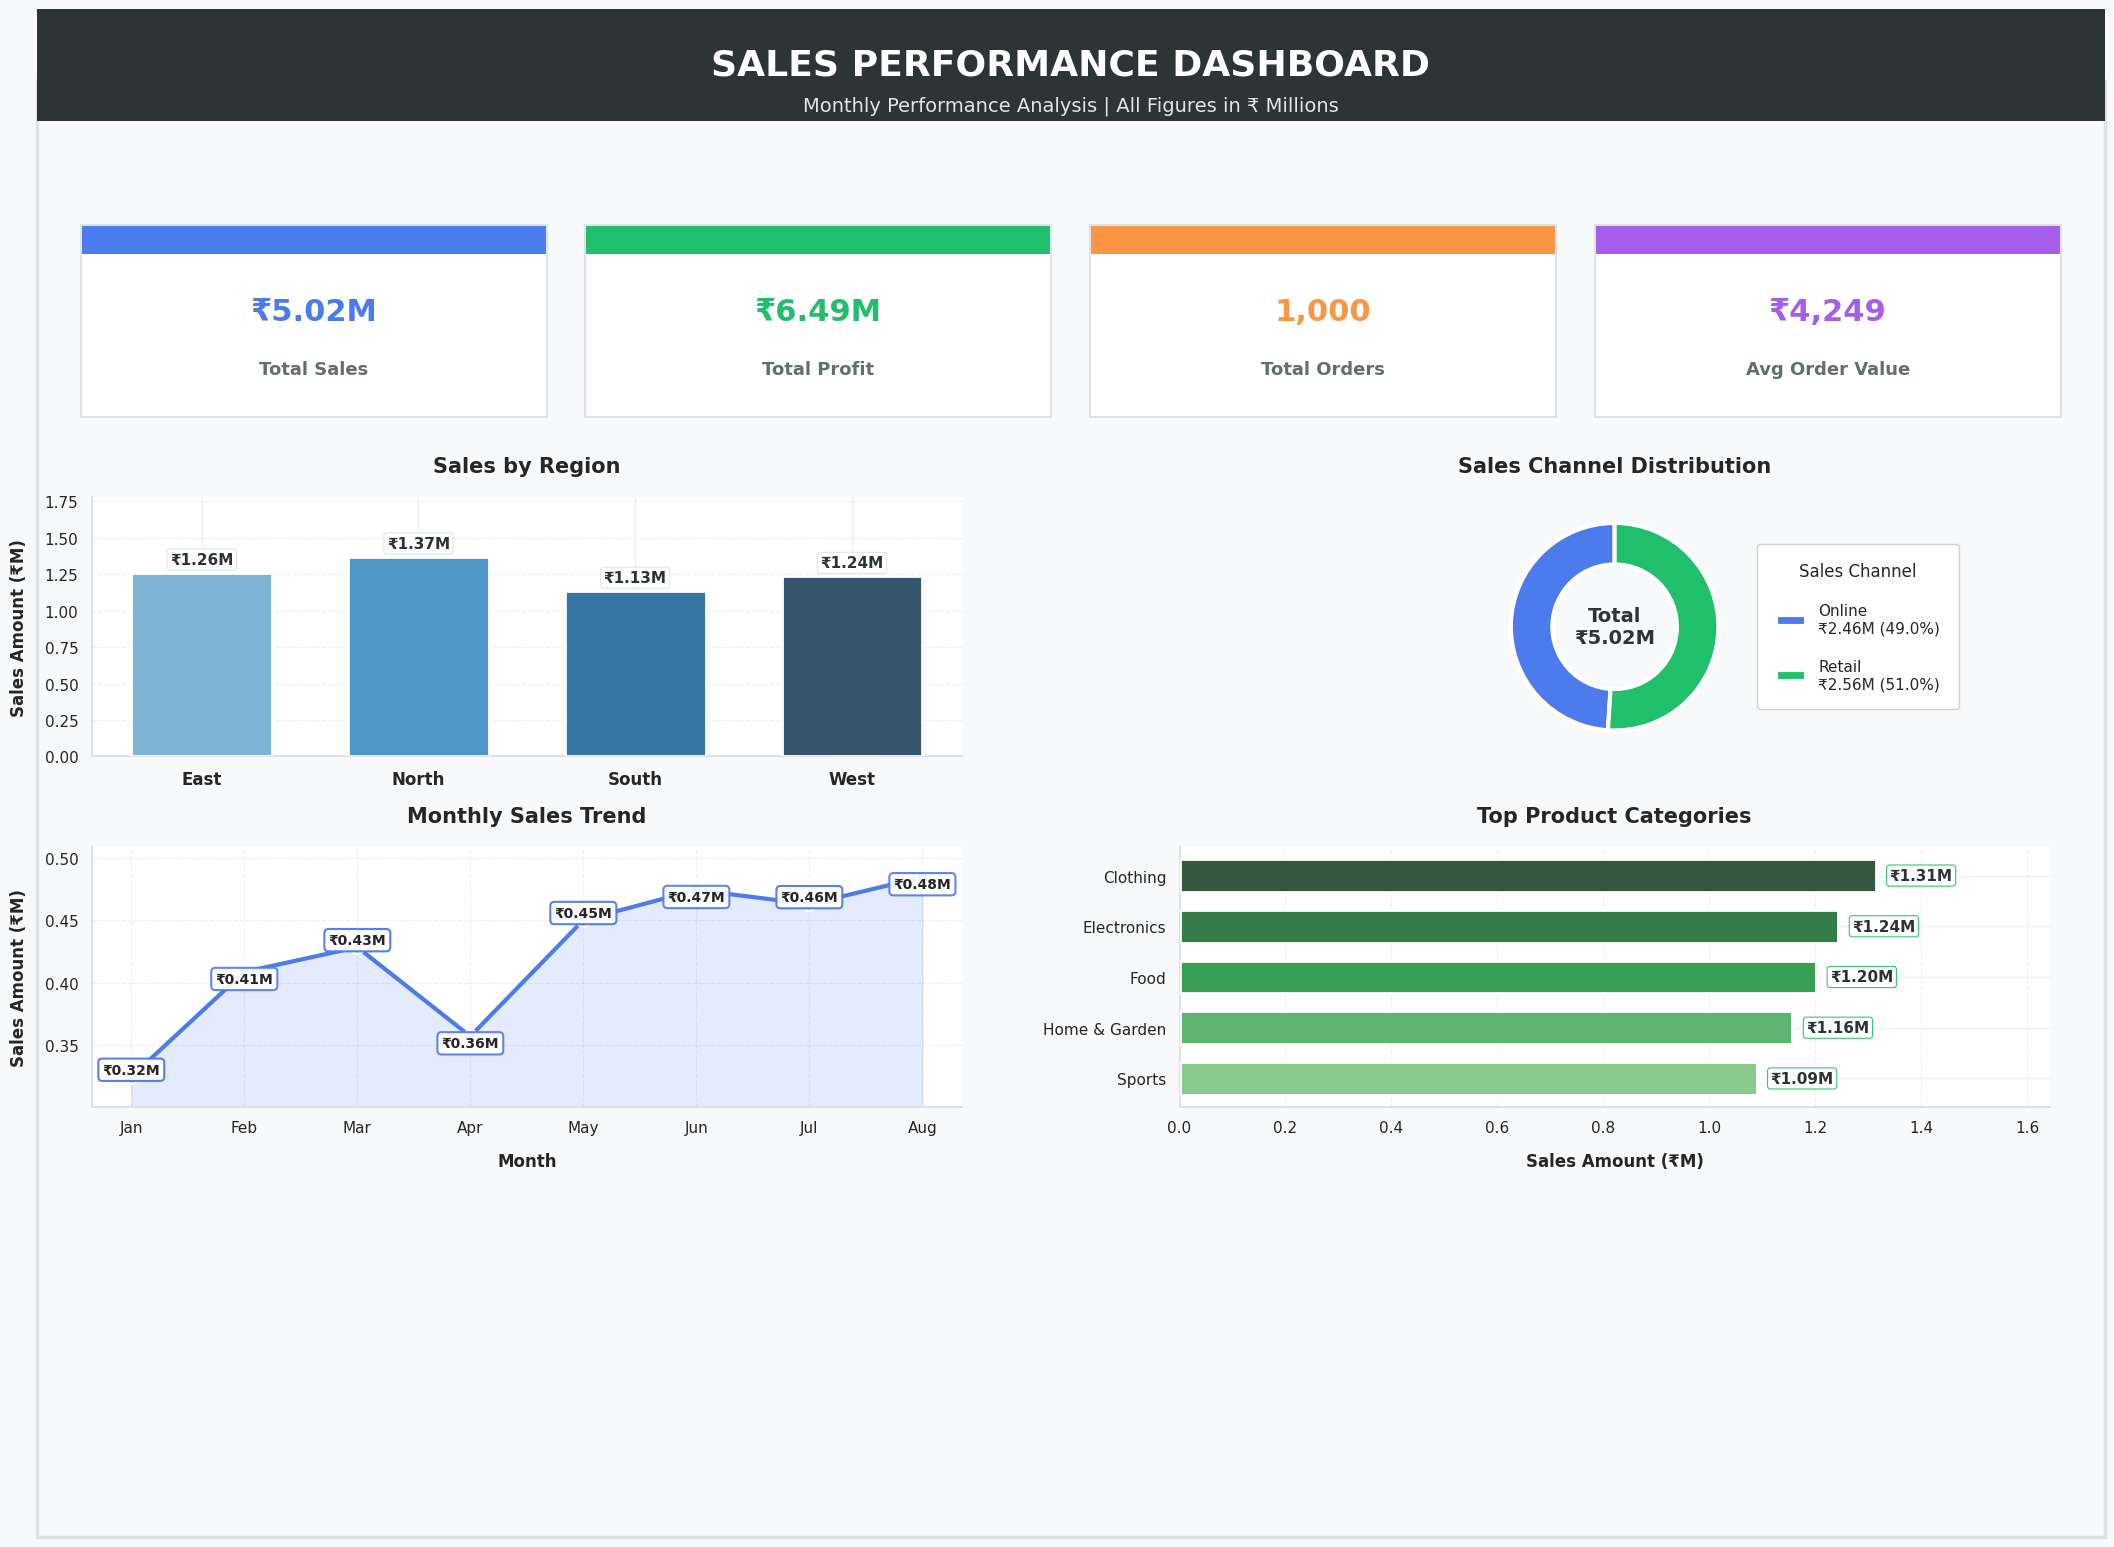

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib import rcParams

# ================= SAMPLE DATA =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= GLOBAL STYLE =================
sns.set_theme(style="whitegrid")
rcParams.update({
    "figure.figsize": (22, 16),  # Slightly taller for better spacing
    "font.size": 11,
    "font.family": "sans-serif",
    "axes.titlesize": 15,
    "axes.titleweight": "bold",
    "axes.titlepad": 18,
    "axes.labelweight": "bold",
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.titlesize": 16,
    "figure.titleweight": "bold"
})

BG_COLOR = "#f8f9fa"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dee2e6"
TITLE_COLOR = "#2d3436"
PRIMARY = "#4b7bec"
SECONDARY = "#20bf6b"
TERTIARY = "#fd9644"
QUATERNARY = "#a55eea"

fig = plt.figure(facecolor=BG_COLOR, tight_layout=False)

# ================= DASHBOARD BORDER =================
dashboard_border = mpatches.Rectangle(
    (0.03, 0.03), 0.94, 0.91,
    linewidth=2.5,
    edgecolor=BORDER_COLOR,
    facecolor='none',
    transform=fig.transFigure,
    zorder=1
)
fig.patches.append(dashboard_border)

# ================= HEADER SECTION =================
header_border = mpatches.Rectangle(
    (0.03, 0.915), 0.94, 0.07,
    linewidth=0,
    edgecolor='none',
    facecolor=TITLE_COLOR,
    transform=fig.transFigure,
    zorder=2
)
fig.patches.append(header_border)

fig.text(
    0.5, 0.95,
    "SALES PERFORMANCE DASHBOARD",
    ha="center", va="center",
    fontsize=26, fontweight="bold",
    color="white", zorder=3
)

fig.text(
    0.5, 0.925,
    "Monthly Performance Analysis | All Figures in ₹ Millions",
    ha="center", va="center",
    fontsize=14, fontweight="normal",
    color="#dfe6e9", zorder=3
)

# ================= KPI SECTION =================
gs_kpi = fig.add_gridspec(
    1, 12,
    left=0.05, right=0.95,
    top=0.85, bottom=0.73,
    wspace=0.3
)

kpi_positions = [
    gs_kpi[0, 0:3],
    gs_kpi[0, 3:6],
    gs_kpi[0, 6:9],
    gs_kpi[0, 9:12]
]

kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']:,}",
    f"₹{top_kpis['Avg_Order_Value']:,.0f}"
]
kpi_colors = [PRIMARY, SECONDARY, TERTIARY, QUATERNARY]

for i in range(4):
    ax = fig.add_subplot(kpi_positions[i])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Add colored bar at top
    bar_patch = mpatches.Rectangle(
        (0, 0.85), 1, 0.15,
        facecolor=kpi_colors[i],
        edgecolor='none',
        transform=ax.transData
    )
    ax.add_patch(bar_patch)

    # Style the border
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)

    # KPI value
    ax.text(0.5, 0.55, kpi_values[i],
            ha="center", va="center",
            fontsize=22, fontweight="bold",
            color=kpi_colors[i])

    # KPI title
    ax.text(0.5, 0.25, kpi_titles[i],
            ha="center", va="center",
            fontsize=13, fontweight="bold",
            color="#636e72")

# ================= CHART SECTION =================
# Main grid for charts - 2 rows, 2 columns for top charts, 1 row for insights
gs_charts = fig.add_gridspec(
    3, 2,  # 3 rows, 2 columns
    left=0.055, right=0.945,
    top=0.68, bottom=0.08,
    hspace=0.35,  # Increased spacing
    wspace=0.25   # Increased spacing
)

# Create chart axes - FIXED: Proper grid arrangement
ax1 = fig.add_subplot(gs_charts[0, 0])  # Sales by Region (Row 0, Col 0)
ax2 = fig.add_subplot(gs_charts[0, 1])  # Sales Channel (Row 0, Col 1)
ax3 = fig.add_subplot(gs_charts[1, 0])  # Monthly Sales Trend (Row 1, Col 0)
ax4 = fig.add_subplot(gs_charts[1, 1])  # Top Products (Row 1, Col 1)
ax5 = fig.add_subplot(gs_charts[2, :])  # Insights - spans both columns (Row 2)

# Apply consistent styling to chart axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_facecolor(CARD_COLOR)
    # Style borders
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)
    # Remove top and right borders
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# ================= CHART 1: SALES BY REGION (FIXED) =================
ax1.set_title("Sales by Region", fontsize=15, fontweight="bold", pad=18)

# Create gradient colors
region_colors = sns.color_palette("Blues_d", n_colors=len(region_kpis))
bars = ax1.bar(
    region_kpis["Region"],
    region_kpis["Sales_Amount"],
    color=region_colors,
    edgecolor='white',
    linewidth=2,
    width=0.65,
    zorder=3
)

ax1.set_xlabel("", fontweight="bold", labelpad=5)  # Removed duplicate x-label
ax1.set_ylabel("Sales Amount (₹M)", fontweight="bold", labelpad=12)
ax1.grid(axis="y", alpha=0.3, linestyle="--", linewidth=0.8, zorder=0)
ax1.set_ylim(0, max(region_kpis["Sales_Amount"]) * 1.3)  # More space for labels

# Add value labels on top of bars with proper spacing
for bar in bars:
    height = bar.get_height()
    # Position label above bar with padding
    label_y = height + (max(region_kpis["Sales_Amount"]) * 0.03)
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        label_y,
        f'₹{height:.2f}M',
        ha='center', va='bottom',
        fontsize=11, fontweight='bold',
        color=TITLE_COLOR,
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                 edgecolor=BORDER_COLOR, linewidth=0.8, alpha=0.9)
    )

# Add x-axis region labels
ax1.set_xticks(range(len(region_kpis)))
ax1.set_xticklabels(region_kpis["Region"], fontsize=12, fontweight='bold')

# ================= CHART 2: SALES CHANNEL DISTRIBUTION =================
ax2.set_title("Sales Channel Distribution", fontsize=15, fontweight="bold", pad=18)
ax2.set_aspect("equal")

# Create donut chart
colors = [PRIMARY, SECONDARY]
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=3,
        antialiased=True
    )
)

# Create detailed legend
total = channel_sales["Sales_Amount"].sum()
legend_labels = []
for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"]):
    percentage = sales/total * 100
    legend_labels.append(f"{channel}\n₹{sales:.2f}M ({percentage:.1f}%)")

# Position legend properly
ax2.legend(
    wedges, legend_labels,
    title="Sales Channel",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    borderpad=1.2,
    labelspacing=1.5,
    title_fontsize=12
)

# Add center text
center_text = f"Total\n₹{total:.2f}M"
ax2.text(0, 0, center_text,
         ha='center', va='center',
         fontsize=14, fontweight='bold',
         color=TITLE_COLOR)

# ================= CHART 3: MONTHLY SALES TREND =================
ax3.set_title("Monthly Sales Trend", fontsize=15, fontweight="bold", pad=18)

# Plot line with gradient fill
x = range(len(monthly_sales))
y = monthly_sales["Sales_Amount"]
ax3.plot(
    x, y,
    marker="o",
    linewidth=3,
    color=PRIMARY,
    markersize=9,
    markerfacecolor=PRIMARY,
    markeredgecolor="white",
    markeredgewidth=2,
    zorder=3
)

# Add gradient fill under the line
ax3.fill_between(x, y, alpha=0.15, color=PRIMARY, zorder=2)

ax3.set_xlabel("Month", fontweight="bold", labelpad=12)
ax3.set_ylabel("Sales Amount (₹M)", fontweight="bold", labelpad=12)
ax3.set_xticks(x)
ax3.set_xticklabels(monthly_sales["Month_Name"], rotation=0, ha='center', fontsize=11)
ax3.grid(True, alpha=0.3, linestyle="--", linewidth=0.8)

# Calculate dynamic positioning for annotations
y_max = y.max()
y_min = y.min()
y_range = y_max - y_min

# Add value labels with smart positioning
for i, (x_val, y_val) in enumerate(zip(x, y)):
    # Alternate label positions
    if i % 2 == 0:
        offset = y_range * 0.08
        va = 'bottom'
        bbox_alpha = 0.95
    else:
        offset = -y_range * 0.08
        va = 'top'
        bbox_alpha = 0.9

    ax3.annotate(f'₹{y_val:.2f}M',
                xy=(x_val, y_val),
                xytext=(0, offset),
                textcoords='offset points',
                ha='center', va=va,
                fontsize=10, fontweight='bold',
                bbox=dict(
                    boxstyle='round,pad=0.3',
                    facecolor='white',
                    edgecolor=PRIMARY,
                    linewidth=1.5,
                    alpha=bbox_alpha
                ),
                zorder=4)

ax3.set_ylim(y_min - y_range * 0.15, y_max + y_range * 0.15)

# ================= CHART 4: TOP PRODUCT CATEGORIES =================
ax4.set_title("Top Product Categories", fontsize=15, fontweight="bold", pad=18)

# Sort and prepare data
top_products = product_sales.sort_values('Sales_Amount', ascending=True)
bar_colors = sns.color_palette("Greens_d", n_colors=len(top_products))

bars = ax4.barh(
    range(len(top_products)),
    top_products["Sales_Amount"],
    color=bar_colors,
    edgecolor='white',
    linewidth=2,
    height=0.65,
    zorder=3
)

ax4.set_xlabel("Sales Amount (₹M)", fontweight="bold", labelpad=12)
ax4.set_yticks(range(len(top_products)))
ax4.set_yticklabels(top_products["Product_Category"], fontsize=11)
ax4.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.8, zorder=0)

# Add value labels
max_val = top_products["Sales_Amount"].max()
for bar, val in zip(bars, top_products["Sales_Amount"]):
    width = bar.get_width()
    # Always place text outside bar for consistency
    text_x = width + max_val * 0.02

    ax4.text(
        text_x,
        bar.get_y() + bar.get_height()/2.,
        f'₹{val:.2f}M',
        ha='left', va='center',
        fontsize=11, fontweight='bold',
        color=TITLE_COLOR,
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                 edgecolor=SECONDARY, linewidth=0.8, alpha=0.9)
    )

ax4.set_xlim(0, max_val * 1.25)

# ================= INSIGHTS SECTION (IMPROVED) =================
ax5.set_facecolor(CARD_COLOR)
ax5.axis('off')  # Turn off axes

# Remove border from insights section
for spine in ax5.spines.values():
    spine.set_visible(False)

# Calculate insights
total_sales = region_kpis['Sales_Amount'].sum()
best_region = region_kpis.loc[region_kpis['Sales_Amount'].idxmax(), 'Region']
best_region_sales = region_kpis['Sales_Amount'].max()
best_month = monthly_sales.loc[monthly_sales['Sales_Amount'].idxmax(), 'Month_Name']
best_month_sales = monthly_sales['Sales_Amount'].max()
best_product = product_sales.loc[product_sales['Sales_Amount'].idxmax(), 'Product_Category']
best_product_sales = product_sales['Sales_Amount'].max()
online_sales = channel_sales.loc[channel_sales['Sales_Channel'] == 'Online', 'Sales_Amount'].values[0]
online_percentage = (online_sales / channel_sales['Sales_Amount'].sum() * 100)
growth_percentage = ((0.484391 - 0.462792) / 0.462792 * 100)

# Create formatted insights with proper alignment
insights_title = "📊 PERFORMANCE INSIGHTS & KEY METRICS"
ax5.text(0.5, 0.95, insights_title,
        ha='center', va='top',
        fontsize=16, fontweight='bold',
        color=PRIMARY,
        transform=ax5.transAxes)

# Create two columns for insights
col1_x = 0.05
col2_x = 0.55
line_height = 0.07
start_y = 0.8

# Column 1: Performance Highlights
section_title1 = "🏆 TOP PERFORMERS"
ax5.text(col1_x, start_y, section_title1,
        ha='left', va='top',
        fontsize=13, fontweight='bold',
        color=SECONDARY,
        transform=ax5.transAxes)

highlights = [
    f"• Best Region: {best_region} (₹{best_region_sales:.2f}M)",
    f"• Peak Month: {best_month} (₹{best_month_sales:.2f}M)",
    f"• Top Product: {best_product} (₹{best_product_sales:.2f}M)",
    f"• Total Sales: ₹{total_sales:.2f}M"
]

for i, text in enumerate(highlights):
    y_pos = start_y - (i + 1) * line_height
    ax5.text(col1_x, y_pos, text,
            ha='left', va='top',
            fontsize=12,
            color=TITLE_COLOR,
            transform=ax5.transAxes)

# Column 2: Channel & Growth Analysis
section_title2 = "📈 CHANNEL & GROWTH"
ax5.text(col2_x, start_y, section_title2,
        ha='left', va='top',
        fontsize=13, fontweight='bold',
        color=TERTIARY,
        transform=ax5.transAxes)

analysis = [
    f"• Online Sales: {online_percentage:.1f}% (₹{online_sales:.2f}M)",
    f"• Retail Sales: {100-online_percentage:.1f}%",
    f"• Monthly Growth: {growth_percentage:+.1f}%",
    f"• Avg Monthly: ₹{monthly_sales['Sales_Amount'].mean():.2f}M"
]

for i, text in enumerate(analysis):
    y_pos = start_y - (i + 1) * line_height
    ax5.text(col2_x, y_pos, text,
            ha='left', va='top',
            fontsize=12,
            color=TITLE_COLOR,
            transform=ax5.transAxes)

# Bottom section: Recommendations
recommendations_y = start_y - 5 * line_height
section_title3 = "💡 RECOMMENDATIONS"
ax5.text(col1_x, recommendations_y, section_title3,
        ha='left', va='top',
        fontsize=13, fontweight='bold',
        color=QUATERNARY,
        transform=ax5.transAxes)

recommendations = [
    f"1. Focus on {best_region} region for maximum ROI",
    f"2. Increase marketing in {best_month} to leverage peak season",
    f"3. Expand {best_product} category offerings",
    f"4. Boost online channel to reach {online_percentage + 5:.0f}% target"
]

for i, text in enumerate(recommendations):
    y_pos = recommendations_y - (i + 1) * line_height
    ax5.text(col1_x, y_pos, text,
            ha='left', va='top',
            fontsize=11.5,
            color="#636e72",
            style='italic',
            transform=ax5.transAxes)

# Add a subtle separator line
separator_y = recommendations_y - 5 * line_height
ax5.axhline(y=separator_y, xmin=0.05, xmax=0.95,
           color=BORDER_COLOR, linewidth=1,
           transform=ax5.transAxes)

# Add timestamp
timestamp = pd.Timestamp.now().strftime("%B %d, %Y | %I:%M %p")
ax5.text(0.5, 0.02, f"Report Generated: {timestamp}",
        ha='center', va='bottom',
        fontsize=10,
        color="#95a5a6",
        style='italic',
        transform=ax5.transAxes)

# ================= FOOTER =================
fig.text(
    0.5, 0.02,
    "Dashboard v1.0 | Data Source: Company Sales Database | © 2024 Sales Analytics",
    ha="center", va="center",
    fontsize=11,
    color="#636e72",
    style="italic"
)

# ================= FINAL ADJUSTMENTS =================
# Add subtle watermark
fig.text(
    0.98, 0.98,
    "CONFIDENTIAL",
    ha="right", va="top",
    fontsize=10,
    color="#dfe6e9",
    alpha=0.5,
    rotation=0,
    fontweight='bold'
)

# Apply tight layout with padding
plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97], pad=2.0)

# Display the dashboard
plt.show()

Using font: DejaVu Sans


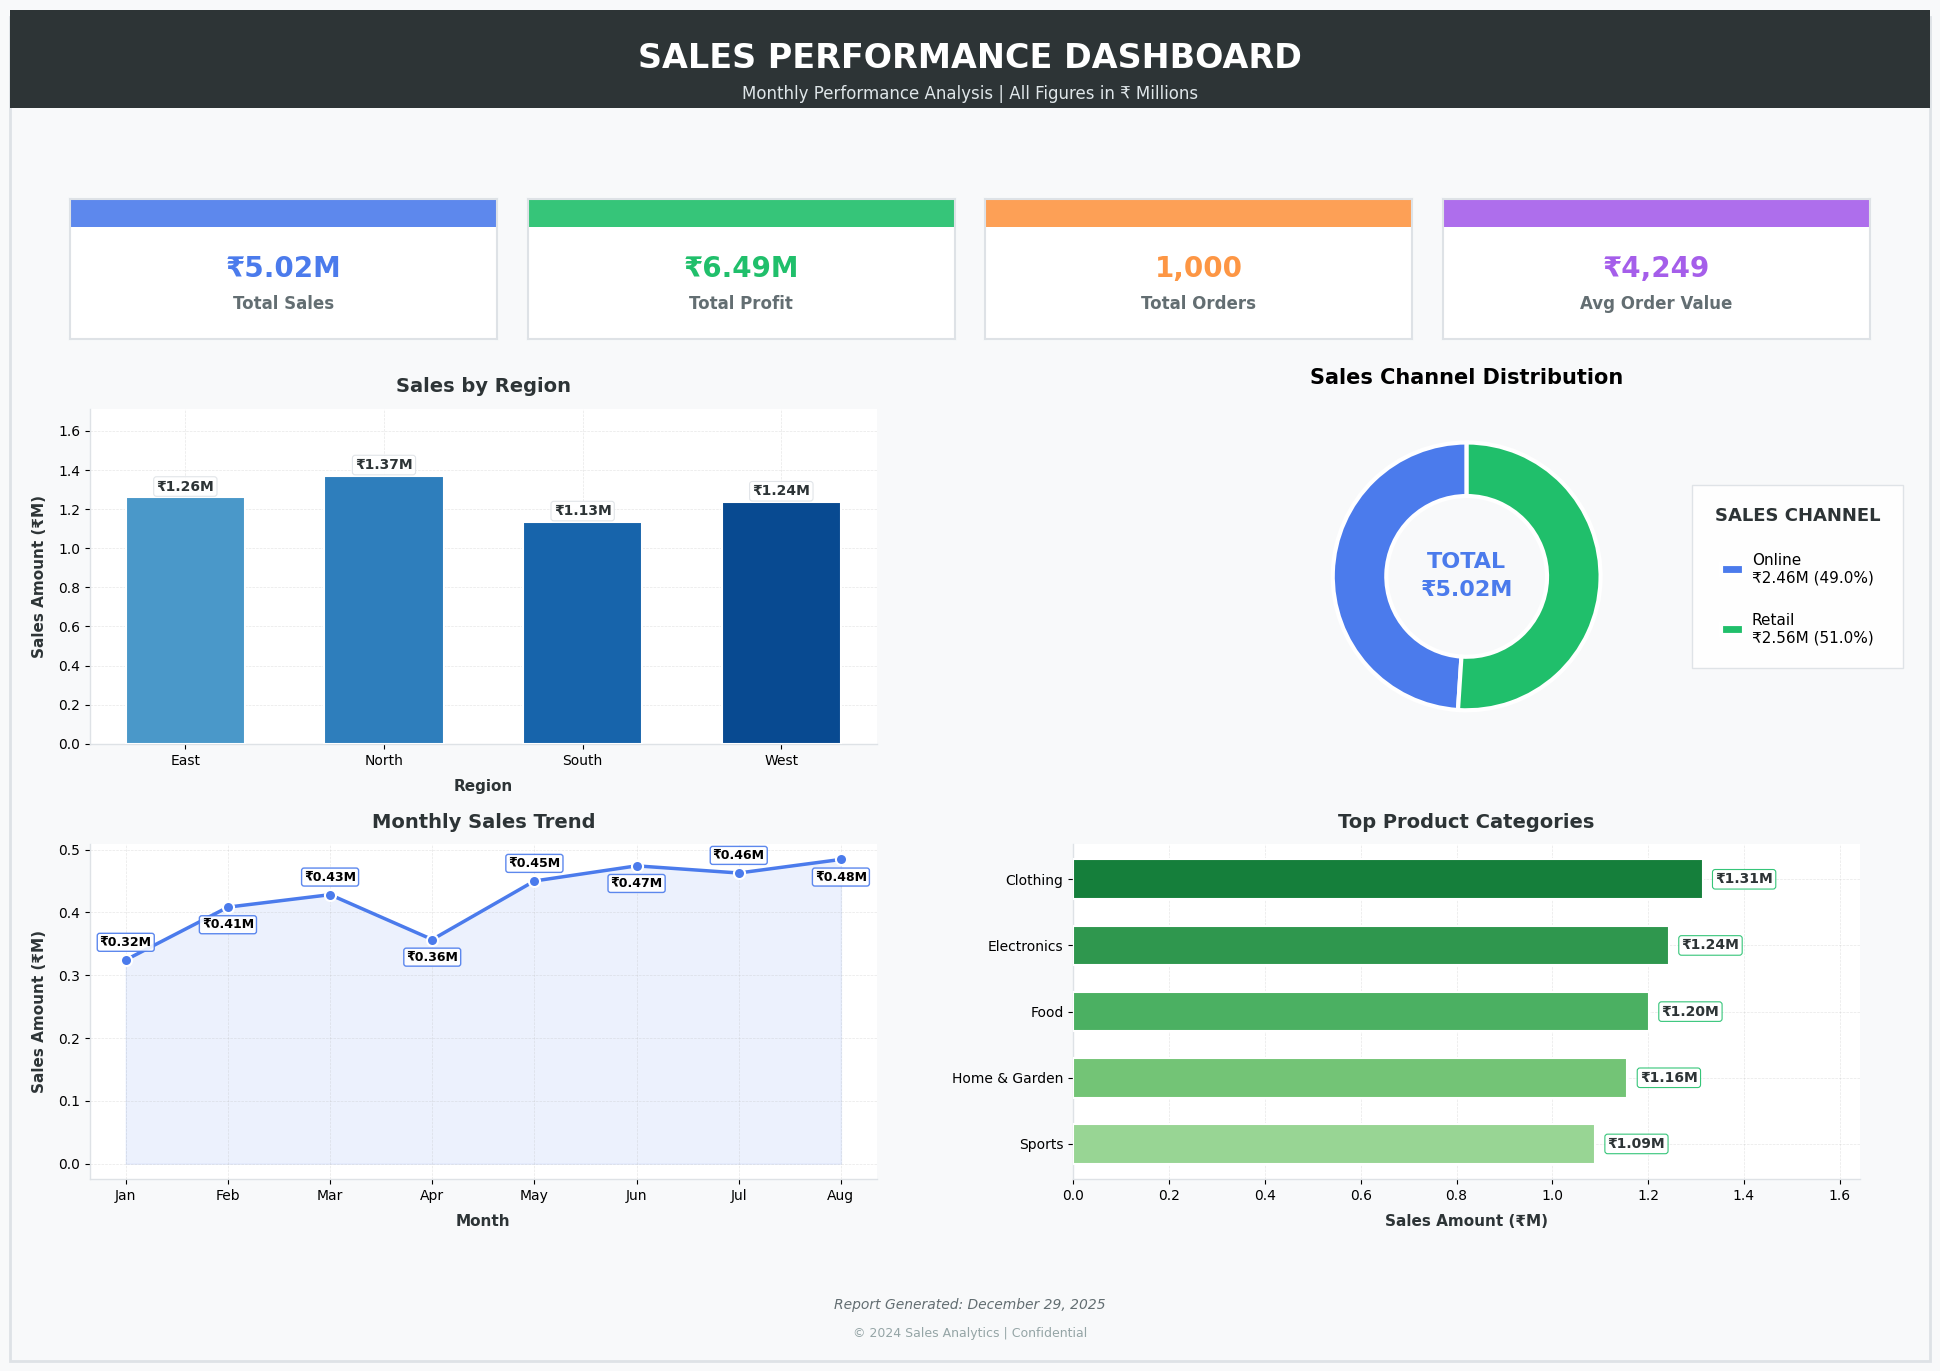

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib

# ================= DATASET =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= GLOBAL STYLE SETUP =================
# Check available fonts and set one that supports rupee symbol
available_fonts = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# Try to find a font that supports rupee symbol - common ones that work:
# 'DejaVu Sans', 'Arial', 'Liberation Sans', 'Ubuntu', 'FreeSans'
preferred_fonts = ['DejaVu Sans', 'Arial', 'Liberation Sans', 'Ubuntu', 'FreeSans', 'Nirmala UI', 'Segoe UI']

# Find the first available font from preferred list
selected_font = 'DejaVu Sans'  # Default
for font in preferred_fonts:
    if font in available_fonts:
        selected_font = font
        break

print(f"Using font: {selected_font}")

# Set style
plt.rcParams.update({
    'figure.figsize': (20, 14),
    'figure.facecolor': '#f8f9fa',
    'font.size': 10,
    'font.family': selected_font,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.titlepad': 12,
    'axes.labelweight': 'bold',
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5
})

BG_COLOR = "#f8f9fa"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dee2e6"
TITLE_COLOR = "#2d3436"
PRIMARY = "#4b7bec"
SECONDARY = "#20bf6b"
TERTIARY = "#fd9644"
QUATERNARY = "#a55eea"

# Create figure WITHOUT tight layout
fig = plt.figure(facecolor=BG_COLOR, dpi=100, constrained_layout=False)

# ================= MAIN CONTAINER =================
main_border = plt.Rectangle((0.02, 0.02), 0.96, 0.96,
                           linewidth=2,
                           edgecolor=BORDER_COLOR,
                           facecolor='none',
                           transform=fig.transFigure,
                           zorder=1)
fig.add_artist(main_border)

# ================= HEADER SECTION =================
header_bg = plt.Rectangle((0.02, 0.915), 0.96, 0.07,
                         linewidth=0,
                         edgecolor='none',
                         facecolor=TITLE_COLOR,
                         transform=fig.transFigure,
                         zorder=2)
fig.add_artist(header_bg)

# Title
fig.text(0.5, 0.95, "SALES PERFORMANCE DASHBOARD",
         ha="center", va="center",
         fontsize=24, fontweight="bold",
         color="white", zorder=3)

# Subtitle - Use rupee symbol
fig.text(0.5, 0.925, "Monthly Performance Analysis | All Figures in ₹ Millions",
         ha="center", va="center",
         fontsize=12, fontweight="normal",
         color="#dfe6e9", zorder=3)

# ================= KPI CARDS SECTION =================
# Create a grid for KPI cards with explicit positioning
kpi_grid = plt.GridSpec(1, 12,
                       left=0.05, right=0.95,
                       top=0.85, bottom=0.75,
                       wspace=0.25, hspace=0)

kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
# Use rupee symbol with proper formatting
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']:,}",
    f"₹{top_kpis['Avg_Order_Value']:,.0f}"
]
kpi_colors = [PRIMARY, SECONDARY, TERTIARY, QUATERNARY]
kpi_positions = [(0, 0, 3), (0, 3, 3), (0, 6, 3), (0, 9, 3)]

# Create KPI cards
kpi_axes = []
for idx, (row, start_col, span) in enumerate(kpi_positions):
    ax = plt.subplot(kpi_grid[row, start_col:start_col+span])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Add colored top bar
    top_bar = plt.Rectangle((0, 0.8), 1, 0.2,
                           facecolor=kpi_colors[idx],
                           edgecolor='none',
                           transform=ax.transAxes,
                           alpha=0.9)
    ax.add_patch(top_bar)

    # Add border
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)

    # Add KPI value
    ax.text(0.5, 0.5, kpi_values[idx],
            ha="center", va="center",
            fontsize=20, fontweight="bold",
            color=kpi_colors[idx])

    # Add KPI title
    ax.text(0.5, 0.25, kpi_titles[idx],
            ha="center", va="center",
            fontsize=12, fontweight="bold",
            color="#636e72")

    kpi_axes.append(ax)

# ================= CHARTS SECTION =================
# Create a 2x2 grid for charts with proper spacing - ADJUSTED SPACING
charts_grid = plt.GridSpec(2, 2,
                          left=0.06, right=0.945,
                          top=0.70, bottom=0.15,  # More bottom space for footer
                          hspace=0.3, wspace=0.25)  # Increased spacing

# Create chart axes
ax1 = plt.subplot(charts_grid[0, 0])  # Sales by Region
ax2 = plt.subplot(charts_grid[0, 1])  # Sales Channel Distribution
ax3 = plt.subplot(charts_grid[1, 0])  # Monthly Sales Trend
ax4 = plt.subplot(charts_grid[1, 1])  # Top Products

# List of all chart axes for styling
chart_axes = [ax1, ax2, ax3, ax4]

# Apply consistent styling to all charts
for ax in chart_axes:
    ax.set_facecolor(CARD_COLOR)
    # Style spines
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1)
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set tick parameters
    ax.tick_params(axis='both', which='both', labelsize=10)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# ================= CHART 1: SALES BY REGION =================
ax1.set_title("Sales by Region", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Create gradient colors for bars
region_colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(region_kpis)))
bars = ax1.bar(region_kpis['Region'],
               region_kpis['Sales_Amount'],
               color=region_colors,
               edgecolor='white',
               linewidth=1.5,
               width=0.6,
               zorder=3)

ax1.set_xlabel("Region", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)
ax1.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹
ax1.set_ylim(0, max(region_kpis['Sales_Amount']) * 1.25)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.,
             height + 0.02,
             f'₹{height:.2f}M',  # Using ₹
             ha='center', va='bottom',
             fontsize=10, fontweight='bold',
             color=TITLE_COLOR,
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                      edgecolor=BORDER_COLOR, linewidth=0.8, alpha=0.9))

# ================= CHART 2: SALES CHANNEL DISTRIBUTION =================
ax2.set_title("Sales Channel Distribution", fontsize=15, fontweight="bold", pad=18)
ax2.set_aspect("equal")

# Create donut chart
colors = [PRIMARY, SECONDARY]
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=3,
        antialiased=True
    )
)

# Create detailed legend with better formatting
total = channel_sales["Sales_Amount"].sum()
legend_labels = []

for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"]):
    percentage = sales/total * 100
    # Format: "Online\n₹2.46M (49.0%)"
    legend_labels.append(f"{channel}\n₹{sales:.2f}M ({percentage:.1f}%)")

# Position legend properly with better spacing
legend = ax2.legend(
    wedges,
    legend_labels,
    title="SALES CHANNEL",
    loc="center left",
    bbox_to_anchor=(1.15, 0.5),  # Moved further right for more space
    fontsize=11,
    frameon=True,
    fancybox=False,  # Changed to False for cleaner box
    shadow=False,
    framealpha=0.95,
    borderpad=1.5,    # More padding
    labelspacing=1.8, # More spacing between labels
    handlelength=1.5, # Longer color handles
    handletextpad=0.5, # Space between color and text
    title_fontsize=13, # Larger title
    edgecolor=BORDER_COLOR,
    facecolor='white'
)

# Make legend title bold
legend.get_title().set_fontweight('bold')
legend.get_title().set_color(TITLE_COLOR)

# Add center text with better visibility
center_text = f"TOTAL\n₹{total:.2f}M"
ax2.text(
    0, 0,
    center_text,
    ha='center',
    va='center',
    fontsize=16,        # Larger font
    fontweight='bold',
    color=PRIMARY,      # Use primary color for emphasis
    linespacing=1.5     # Better line spacing
)

# Remove axes for cleaner look
ax2.axis('off')

# ================= CHART 3: MONTHLY SALES TREND =================
ax3.set_title("Monthly Sales Trend", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Plot line chart
ax3.plot(monthly_sales['Month_Name'],
         monthly_sales['Sales_Amount'],
         marker='o',
         linewidth=2.5,
         color=PRIMARY,
         markersize=8,
         markerfacecolor=PRIMARY,
         markeredgecolor='white',
         markeredgewidth=1.5,
         zorder=3)

# Add fill under the line
ax3.fill_between(range(len(monthly_sales)),
                 monthly_sales['Sales_Amount'],
                 alpha=0.1,
                 color=PRIMARY)

ax3.set_xlabel("Month", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)
ax3.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹

# Add value labels
for i, (month, sales) in enumerate(zip(monthly_sales['Month_Name'], monthly_sales['Sales_Amount'])):
    ax3.annotate(f'₹{sales:.2f}M',  # Using ₹
                 xy=(i, sales),
                 xytext=(0, 8 if i % 2 == 0 else -8),
                 textcoords='offset points',
                 ha='center', va='bottom' if i % 2 == 0 else 'top',
                 fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.2',
                          facecolor='white',
                          edgecolor=PRIMARY,
                          alpha=0.9))

# ================= CHART 4: TOP PRODUCT CATEGORIES =================
ax4.set_title("Top Product Categories", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Sort data for horizontal bar chart
sorted_products = product_sales.sort_values('Sales_Amount', ascending=True)

# Create horizontal bars with gradient colors
product_colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(sorted_products)))
bars = ax4.barh(range(len(sorted_products)),
                sorted_products['Sales_Amount'],
                color=product_colors,
                edgecolor='white',
                linewidth=1.5,
                height=0.6,
                zorder=3)

ax4.set_yticks(range(len(sorted_products)))
ax4.set_yticklabels(sorted_products['Product_Category'], fontsize=10)
ax4.set_xlabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹

# Add value labels
max_sales = sorted_products['Sales_Amount'].max()
for i, (bar, sales) in enumerate(zip(bars, sorted_products['Sales_Amount'])):
    width = bar.get_width()
    ax4.text(width + max_sales * 0.02,
             bar.get_y() + bar.get_height()/2,
             f'₹{sales:.2f}M',  # Using ₹
             ha='left', va='center',
             fontsize=10, fontweight='bold',
             color=TITLE_COLOR,
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                      edgecolor=SECONDARY, linewidth=0.8, alpha=0.9))

ax4.set_xlim(0, max_sales * 1.25)

# ================= FOOTER =================
# Add simple timestamp
timestamp = pd.Timestamp.now().strftime("%B %d, %Y")
fig.text(0.5, 0.06,
         f"Report Generated: {timestamp}",
         ha="center", va="center",
         fontsize=10,
         color="#636e72",
         style="italic")

# Add copyright
fig.text(0.5, 0.04,
         "© 2024 Sales Analytics | Confidential",
         ha="center", va="center",
         fontsize=9,
         color="#95a5a6")

# ================= MANUAL LAYOUT ADJUSTMENT =================
# Instead of tight_layout, manually adjust spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.08,
                   hspace=0.3, wspace=0.25)

# Display the dashboard
plt.show()